<a href="https://colab.research.google.com/github/kjghfnxggdgbvg/mamatha/blob/main/Copy_of_assignment_forecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from io import IncrementalNewlineDecoder
import pandas as pd
import numpy as np
%matplotlib inline

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_excel('CocaCola_Sales_Rawdata.xlsx')
df.head(10)

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


In [ ]:
df.tail()

,Quarter,Sales
37,Q2_95,4936.0
38,Q3_95,4895.0
39,Q4_95,4333.0
40,Q1_96,4194.0
41,Q2_96,5253.0


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

import calendar
from math import sqrt
from pandas import datetime
import plotly.express as px
from scipy.stats import boxcox
import plotly.graph_objects as go
from pandas.plotting import lag_plot
import statsmodels.formula.api as smf
from plotly.subplots import make_subplots
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing


In [ ]:
df['Quarter_Year'] = df['Quarter'].str.split('_').apply(lambda x: ' 19'.join(x[:]))

In [ ]:
df['Date'] = (pd.to_datetime(df['Quarter_Year'].str.split(' ').apply(lambda x: ''.join(x[::-1])),dayfirst=True))
df.head(10)

,Quarter,Sales,Quarter_Year,Date
0,Q1_86,1734.827000,Q1 1986,1986-01-01
1,Q2_86,2244.960999,Q2 1986,1986-04-01
2,Q3_86,2533.804993,Q3 1986,1986-07-01
3,Q4_86,2154.962997,Q4 1986,1986-10-01
4,Q1_87,1547.818996,Q1 1987,1987-01-01
5,Q2_87,2104.411995,Q2 1987,1987-04-01
6,Q3_87,2014.362999,Q3 1987,1987-07-01
7,Q4_87,1991.746998,Q4 1987,1987-10-01
8,Q1_88,1869.049999,Q1 1988,1988-01-01
9,Q2_88,2313.631996,Q2 1988,1988-04-01


In [ ]:
df['Quarters'] = 0

for i in range(42):
    n = df['Quarter'][i]
    df['Quarters'][i] = n[0:2]

Creating Dummy Variables for Quarters Variable

In [ ]:
dummy = pd.DataFrame(pd.get_dummies(df['Quarters']))
df1 = pd.concat((df, dummy), axis=1)

df1.head()

,Quarter,Sales,Quarter_Year,Date,Quarters,Q1,Q2,Q3,Q4
0,Q1_86,1734.827000,Q1 1986,1986-01-01,Q1,1,0,0,0
1,Q2_86,2244.960999,Q2 1986,1986-04-01,Q2,0,1,0,0
2,Q3_86,2533.804993,Q3 1986,1986-07-01,Q3,0,0,1,0
3,Q4_86,2154.962997,Q4 1986,1986-10-01,Q4,0,0,0,1
4,Q1_87,1547.818996,Q1 1987,1987-01-01,Q1,1,0,0,0


In [ ]:
df1.drop(['Quarter','Quarter_Year'] , axis =1, inplace = True)
df1.head()

,Sales,Date,Quarters,Q1,Q2,Q3,Q4
0,1734.827000,1986-01-01,Q1,1,0,0,0
1,2244.960999,1986-04-01,Q2,0,1,0,0
2,2533.804993,1986-07-01,Q3,0,0,1,0
3,2154.962997,1986-10-01,Q4,0,0,0,1
4,1547.818996,1987-01-01,Q1,1,0,0,0


In [ ]:
df1.set_index('Date',inplace=True)
df1.index.year


Int64Index([1986, 1986, 1986, 1986, 1987, 1987, 1987, 1987, 1988, 1988, 1988,
            1988, 1989, 1989, 1989, 1989, 1990, 1990, 1990, 1990, 1991, 1991,
            1991, 1991, 1992, 1992, 1992, 1992, 1993, 1993, 1993, 1993, 1994,
            1994, 1994, 1994, 1995, 1995, 1995, 1995, 1996, 1996],
           dtype='int64', name='Date')

In [ ]:
df1.head()

,Sales,Quarters,Q1,Q2,Q3,Q4
Date,,,,,,
1986-01-01,1734.827000,Q1,1,0,0,0
1986-04-01,2244.960999,Q2,0,1,0,0
1986-07-01,2533.804993,Q3,0,0,1,0
1986-10-01,2154.962997,Q4,0,0,0,1
1987-01-01,1547.818996,Q1,1,0,0,0


In [ ]:
# lag plot

In [ ]:
from pandas.plotting import lag_plot
import matplotlib.pyplot as plt


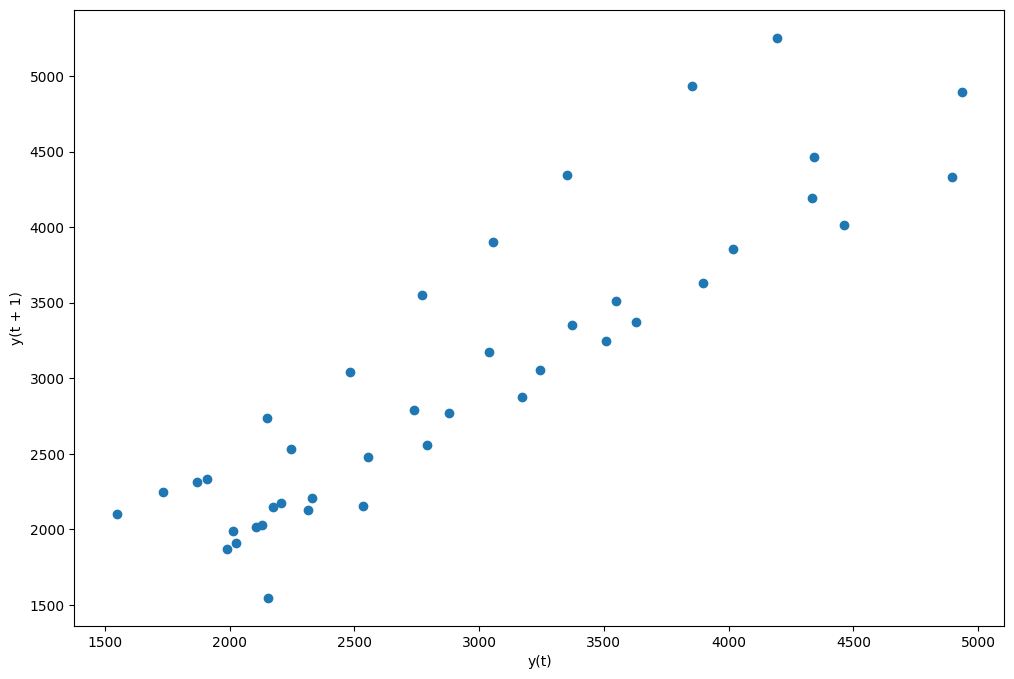

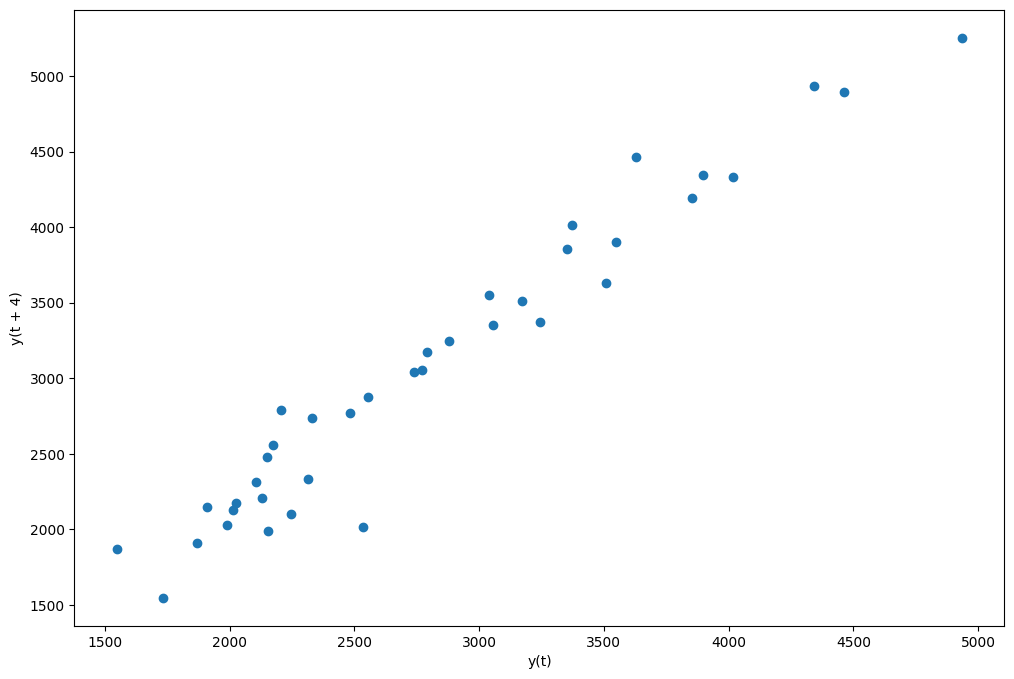

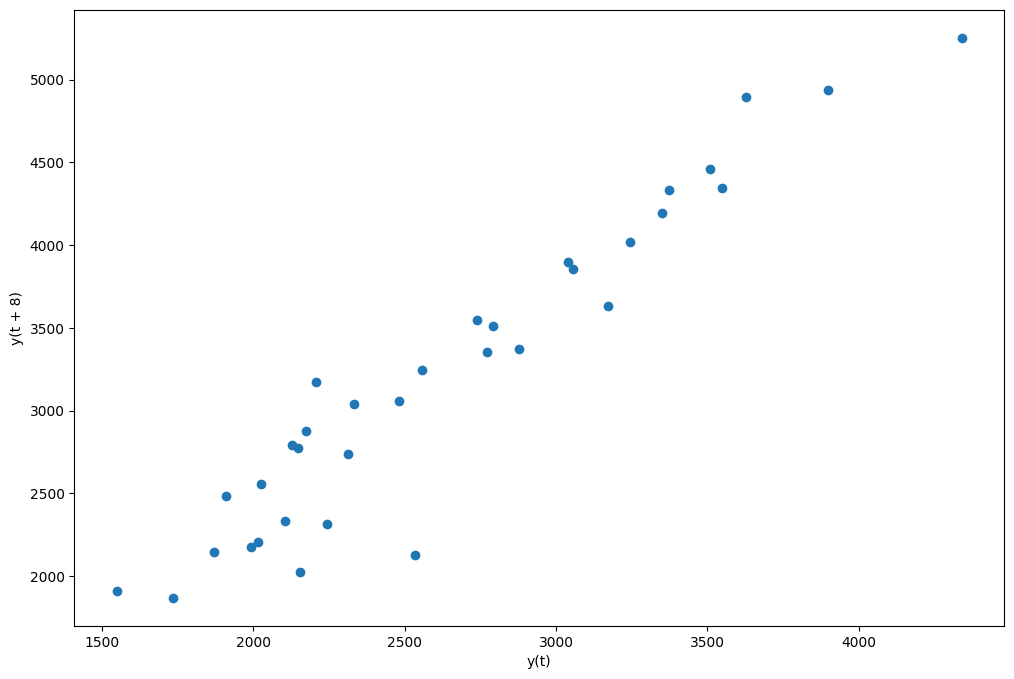

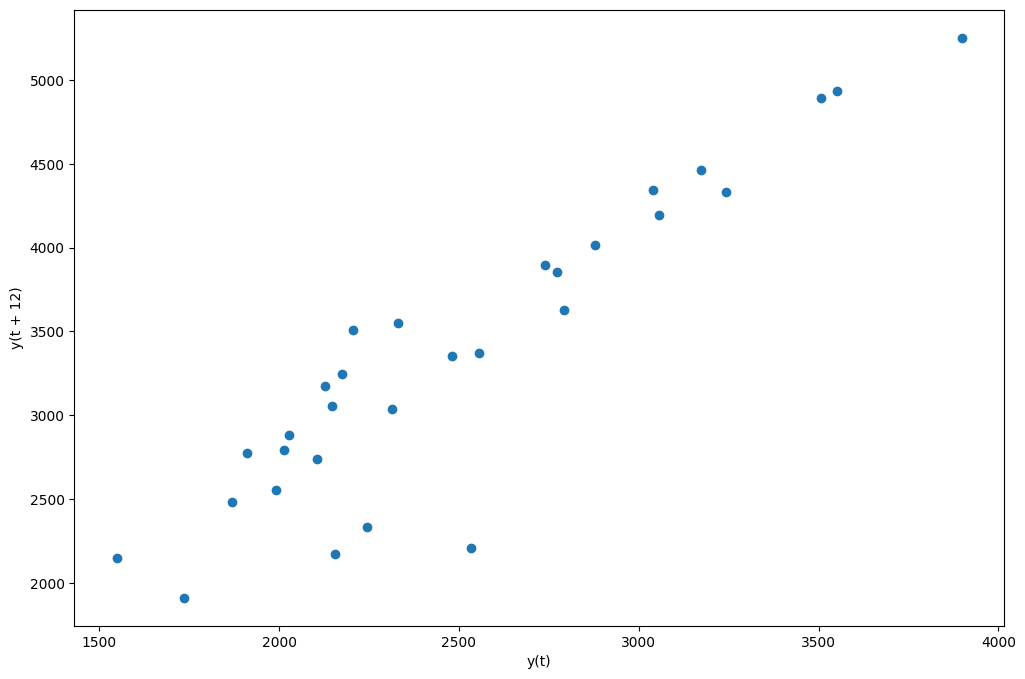

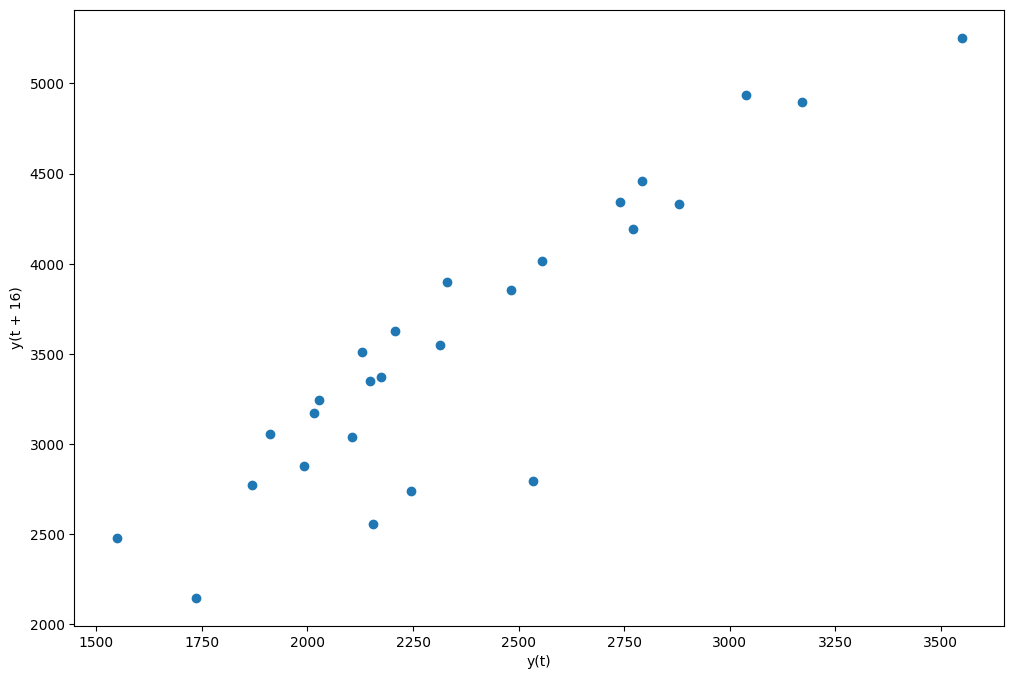

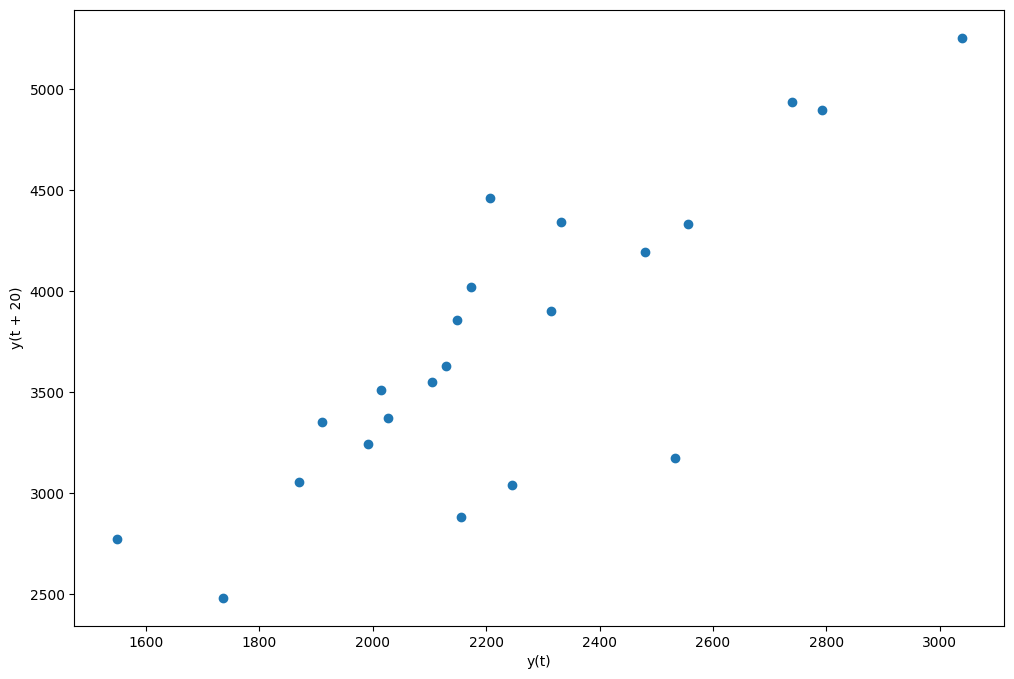

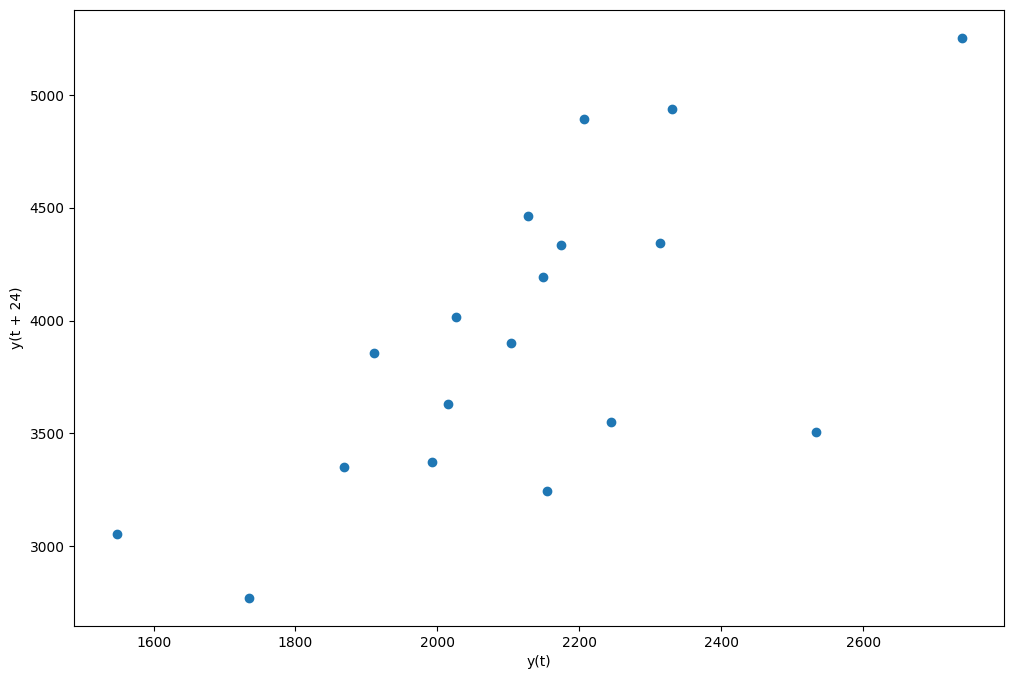

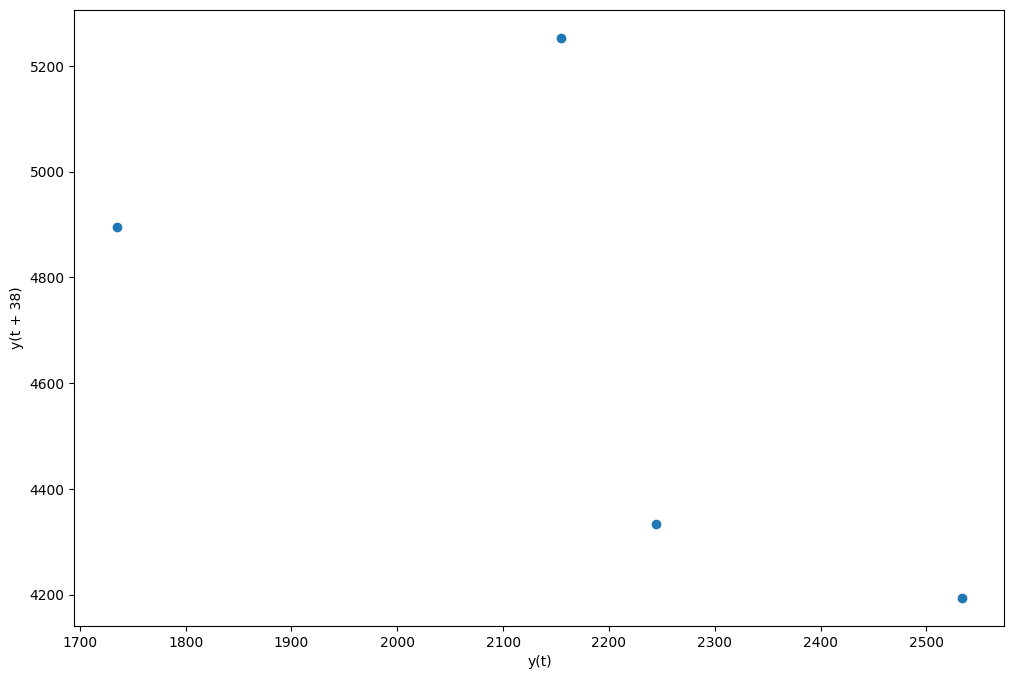

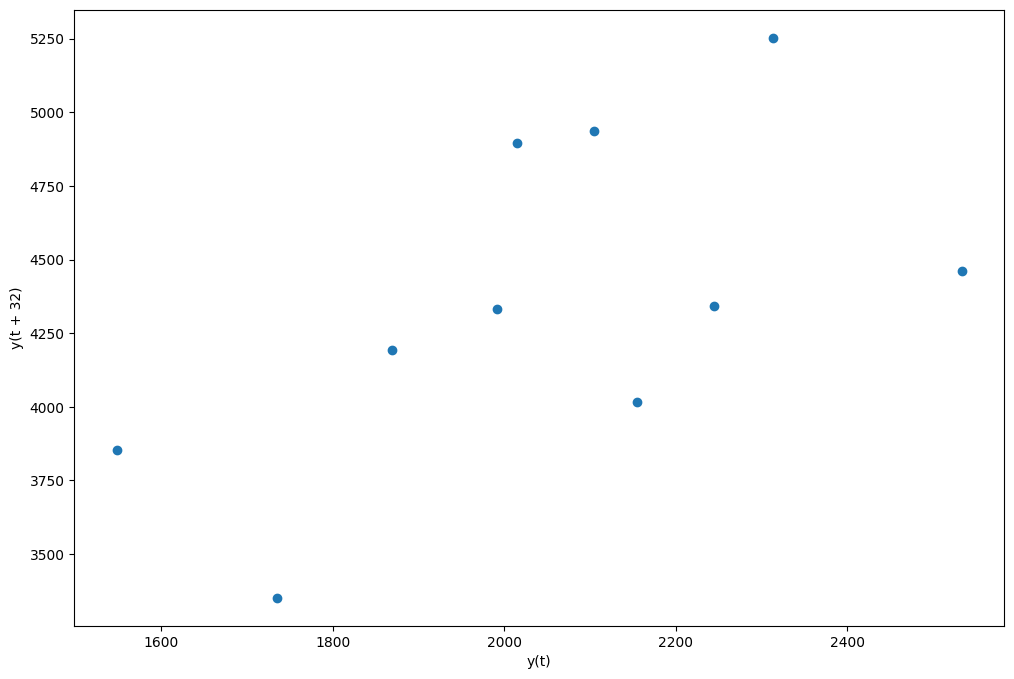

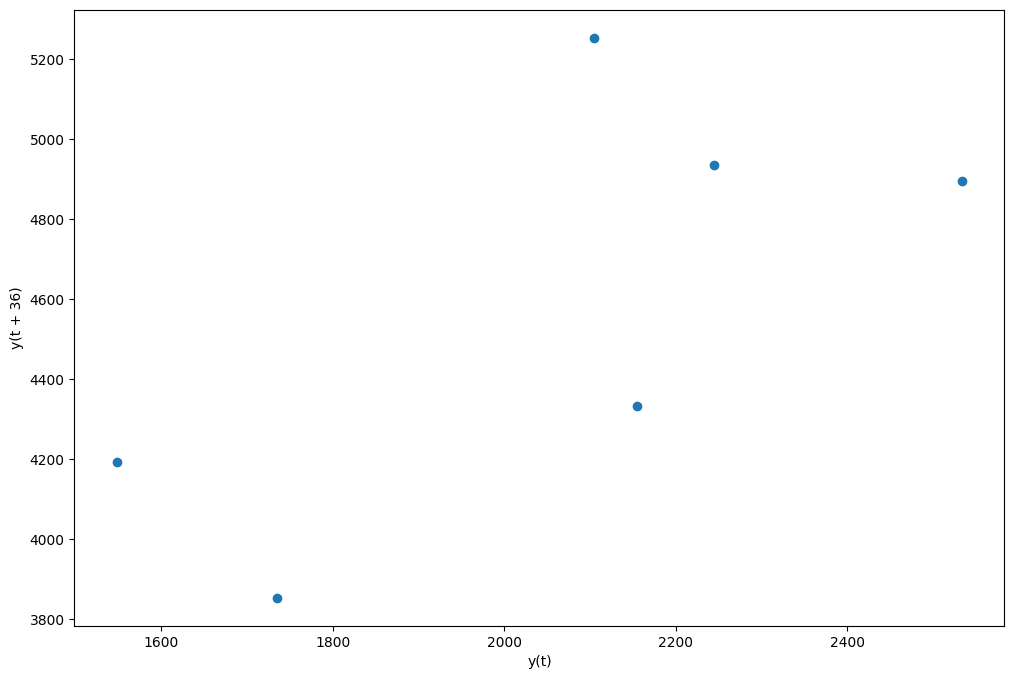

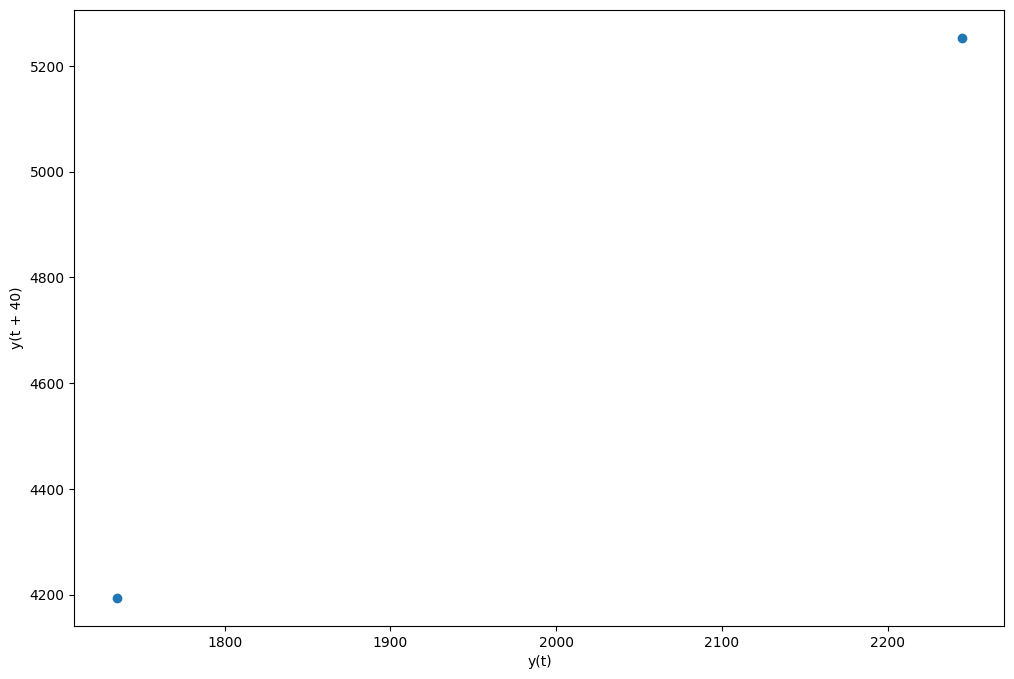

In [ ]:

for i in [1, 4, 8, 12, 16, 20, 24, 38, 32, 36, 40]:
    plt.figure(figsize=(12,8))
    lag_plot(df.Sales, lag=i)
    plt.show()

Moving Average

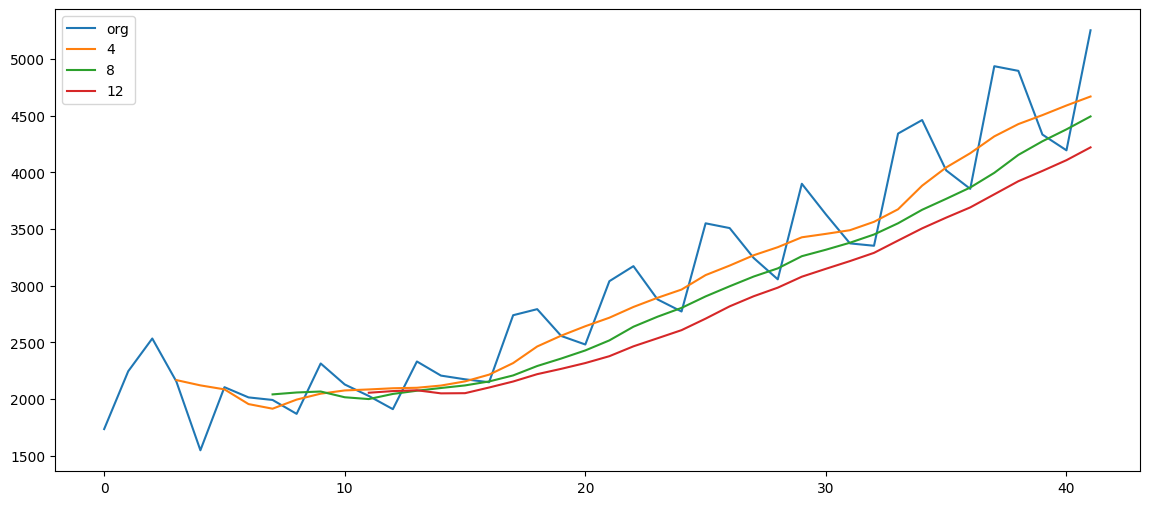

In [ ]:
plt.figure(figsize=(14,6))
df.Sales.plot(label="org")
for i in range(4,13,4):
    df["Sales"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')
plt.show()

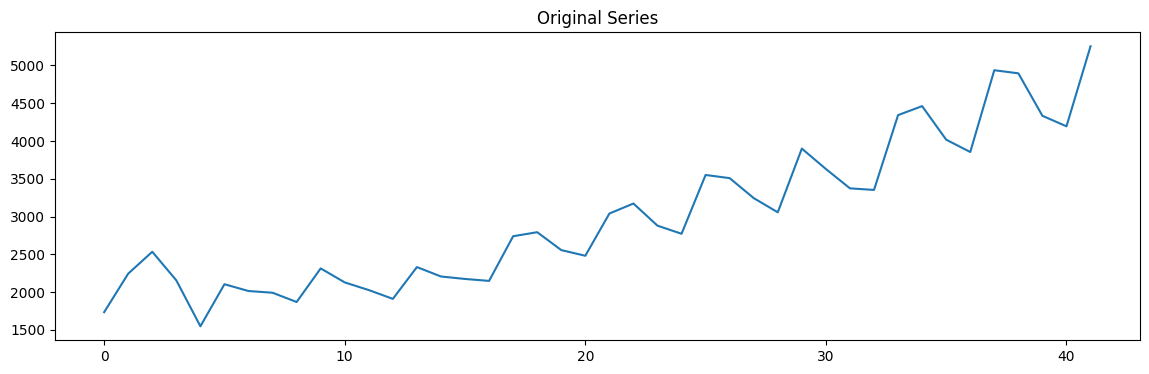

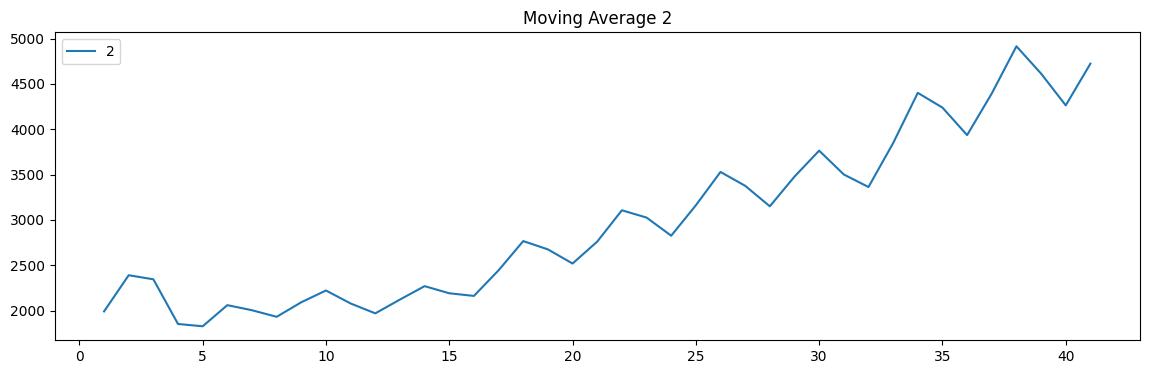

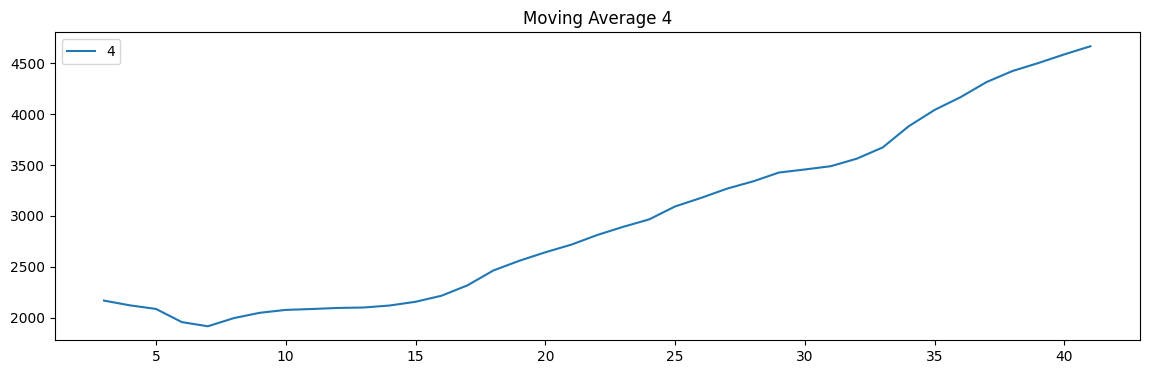

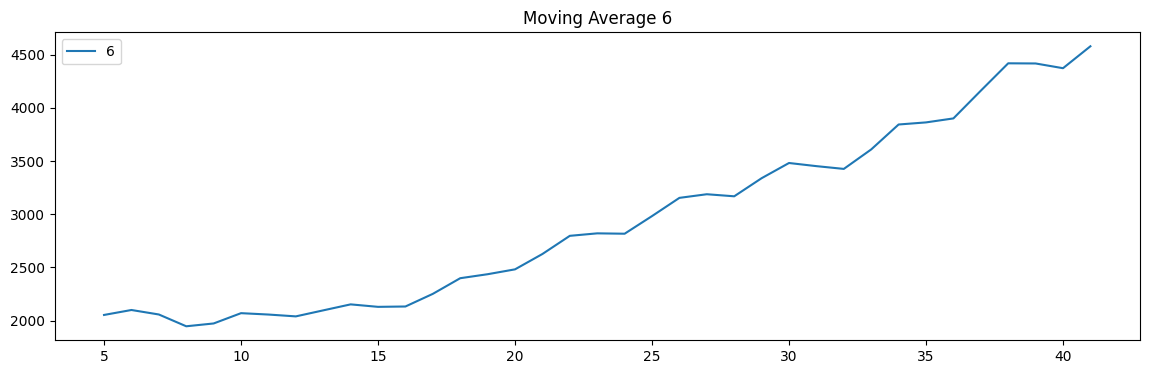

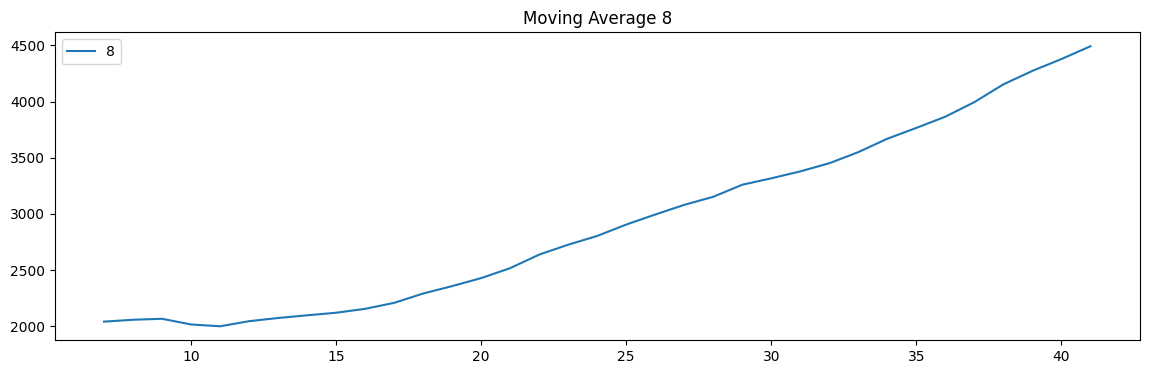

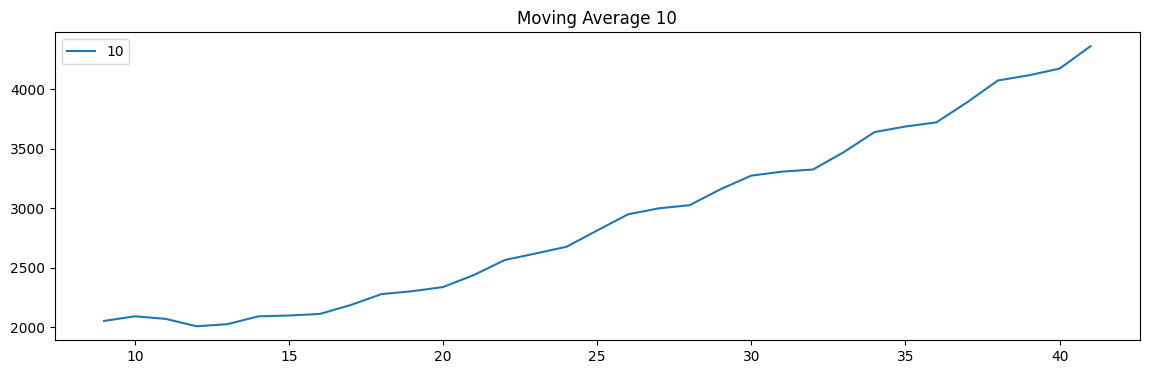

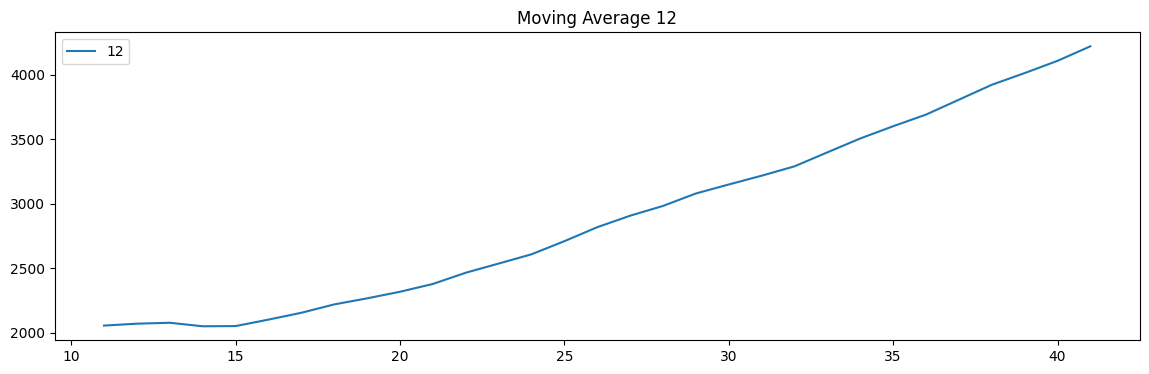

In [ ]:
plt.figure(figsize=(14,4))
df.Sales.plot(label="org")
plt.title("Original Series")
for i in range(2,13,2):
    plt.figure(figsize=(14,4))
    df["Sales"].rolling(i).mean().plot(label=str(i))
    plt.title("Moving Average "+str(i))
    plt.legend(loc='best')
    plt.show()

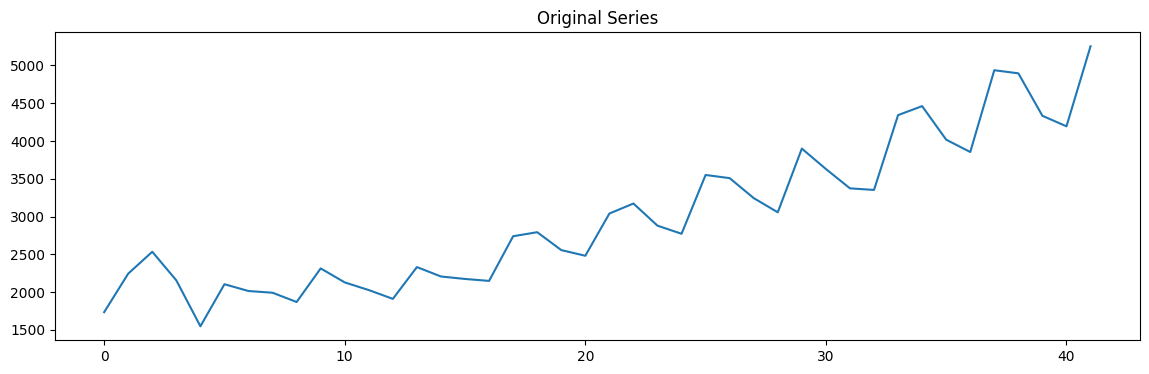

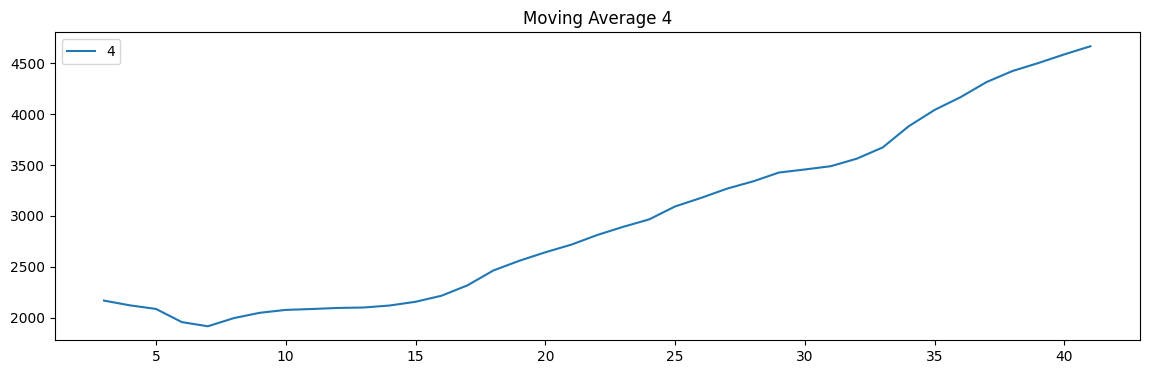

In [ ]:
plt.figure(figsize=(14,4))
df.Sales.plot(label="org")
plt.title("Original Series")
plt.figure(figsize=(14,4))
df["Sales"].rolling(4).mean().plot(label=str(4))
plt.title("Moving Average "+str(4))
plt.legend(loc='best')
plt.show()

In [ ]:
#ACF plots and PACF plots
#Autocorrelation Function (ACF)

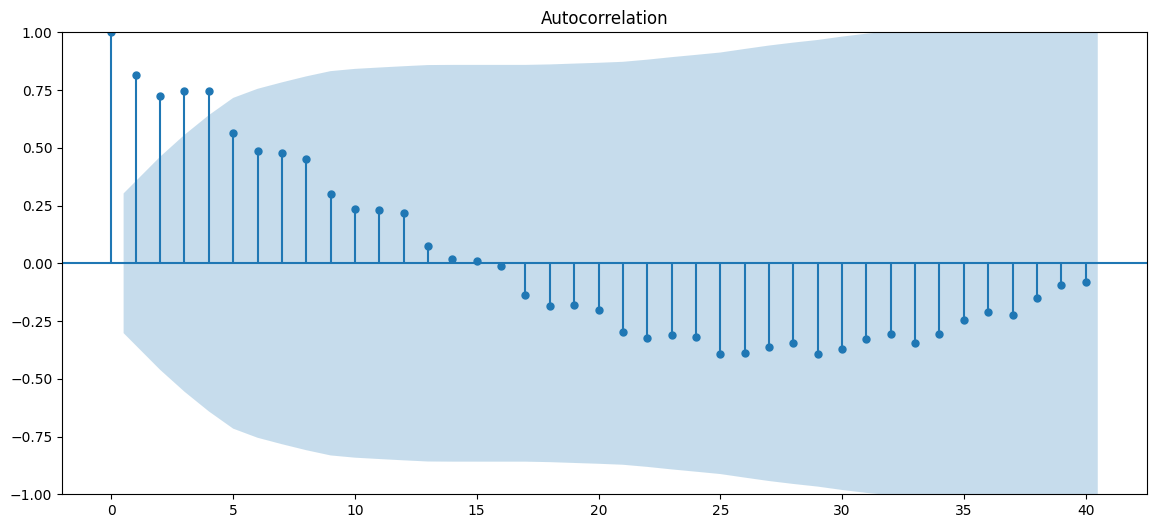

In [ ]:
import statsmodels.graphics.tsaplots as tsa_plots
with plt.rc_context():
    plt.rc("figure", figsize=(14,6))
    tsa_plots.plot_acf(df.Sales, lags=40)
    plt.show()

In [ ]:
#Partial Autocorrelation Function (PACF)


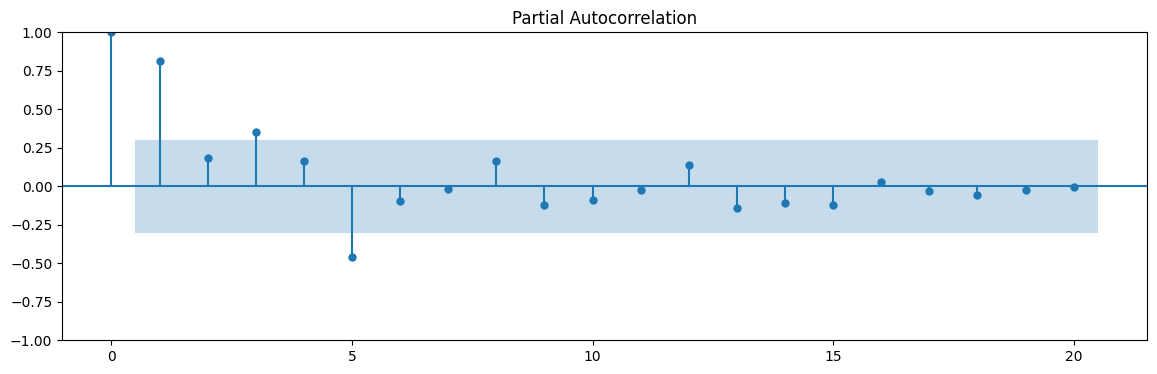

In [ ]:
import statsmodels.graphics.tsaplots as tsa_plots
with plt.rc_context():
    plt.rc("figure", figsize=(14,4))
    tsa_plots.plot_pacf(df.Sales,lags=20)
    plt.show()

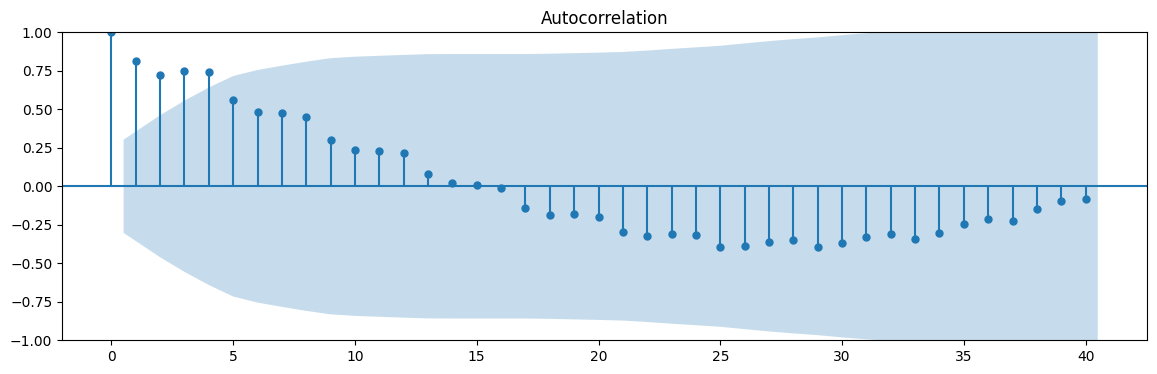

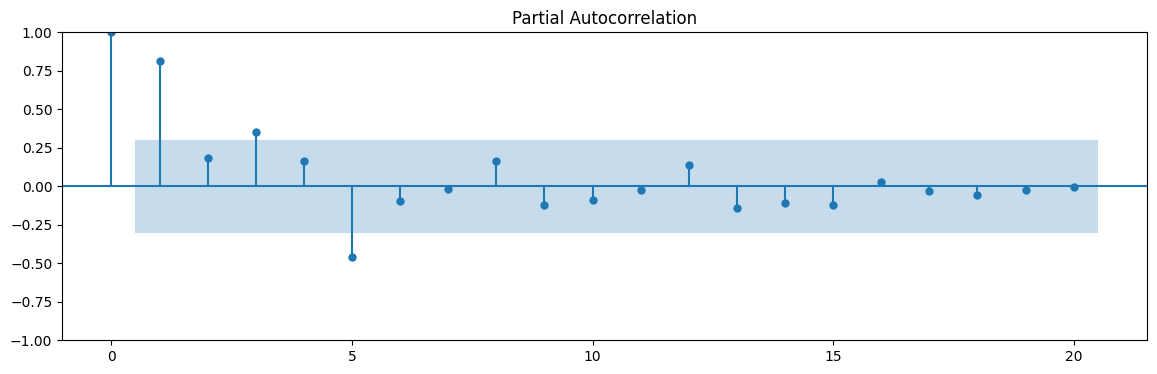

In [ ]:
import statsmodels.graphics.tsaplots as tsa_plots
with plt.rc_context():
    plt.rc("figure", figsize=(14,4))
    tsa_plots.plot_acf(df.Sales,lags=40)
    tsa_plots.plot_pacf(df.Sales,lags=20)
    plt.show()

Sampling

Linear interpolation

UpSampling with respect to month

In [ ]:
month = df1.drop(['Quarters','Q1','Q2','Q3','Q4'], axis=1)
month = month.resample('M').mean()
print(month.head(13))

                  Sales
Date                   
1986-01-31  1734.827000
1986-02-28          NaN
1986-03-31          NaN
1986-04-30  2244.960999
1986-05-31          NaN
1986-06-30          NaN
1986-07-31  2533.804993
1986-08-31          NaN
1986-09-30          NaN
1986-10-31  2154.962997
1986-11-30          NaN
1986-12-31          NaN
1987-01-31  1547.818996


                  Sales
Date                   
1986-01-31  1734.827000
1986-02-28  1904.871666
1986-03-31  2074.916332
1986-04-30  2244.960999
1986-05-31  2341.242330
1986-06-30  2437.523661
1986-07-31  2533.804993
1986-08-31  2407.524328
1986-09-30  2281.243663
1986-10-31  2154.962997
1986-11-30  1952.581664
1986-12-31  1750.200330
1987-01-31  1547.818996


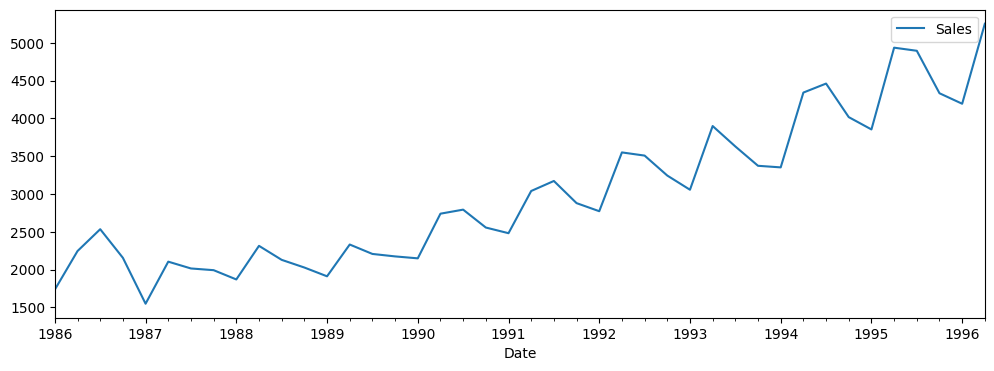

In [ ]:
interpolated = month.interpolate(method='linear')
print(interpolated.head(13))
interpolated.plot(figsize=(12,4))
plt.show()

In [ ]:
interpolated

,Sales
Date,
1986-01-31,1734.827000
1986-02-28,1904.871666
1986-03-31,2074.916332
1986-04-30,2244.960999
1986-05-31,2341.242330
...,...
1995-12-31,4240.333333
1996-01-31,4194.000000
1996-02-29,4547.000000


In [ ]:
#SPLIT TRAINING AND TESTING DATA

In [ ]:
train_data = interpolated[:100]
test_data = interpolated[100:]

In [ ]:
print('Train :',train_data.index.min(),train_data.index.max())

Train : 1986-01-31 00:00:00 1994-04-30 00:00:00


In [ ]:
print('Test :',test_data.index.min(),test_data.index.max())

Test : 1994-05-31 00:00:00 1996-04-30 00:00:00


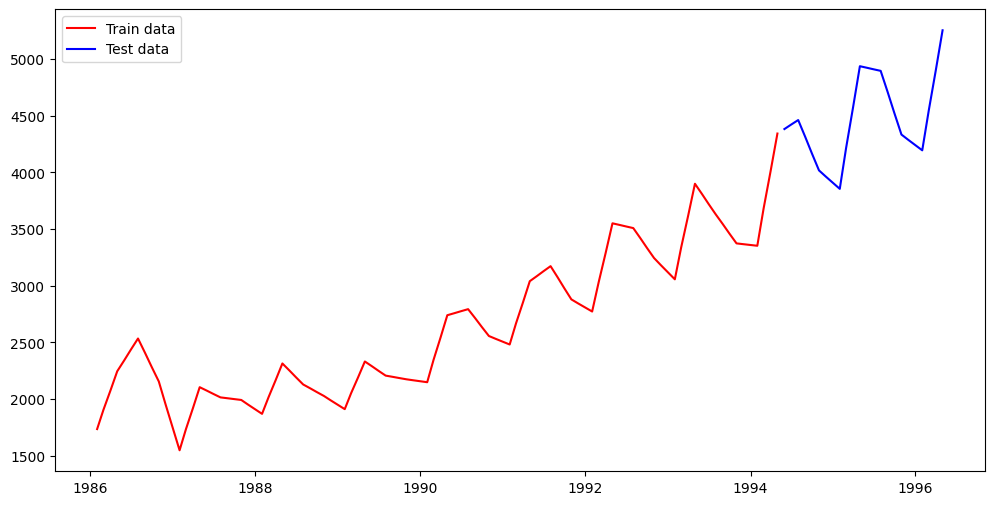

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(train_data, 'red', label='Train data')
plt.plot(test_data, 'blue', label='Test data')
plt.legend()
plt.show()

In [ ]:
# fitting the model

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

model = ExponentialSmoothing(train_data['Sales'],trend='mul',seasonal='mul',seasonal_periods=12)
fitted_model = model.fit()

In [ ]:
#evaluating model against test set

In [ ]:
test_predictions = fitted_model.forecast(24)


In [ ]:
test_predictions

1994-05-31    4355.872195
1994-06-30    4371.191083
1994-07-31    4383.655303
1994-08-31    4291.799939
1994-09-30    4190.867317
1994-10-31    4077.783635
1994-11-30    3983.872501
1994-12-31    3881.129910
1995-01-31    3783.012082
1995-02-28    4131.757943
1995-03-31    4493.609517
1995-04-30    4865.498607
1995-05-31    4880.962648
1995-06-30    4898.128193
1995-07-31    4912.094947
1995-08-31    4809.166628
1995-09-30    4696.066808
1995-10-31    4569.351147
1995-11-30    4464.119240
1995-12-31    4348.991264
1996-01-31    4239.045556
1996-02-29    4629.831934
1996-03-31    5035.303890
1996-04-30    5452.023360
Freq: M, dtype: float64

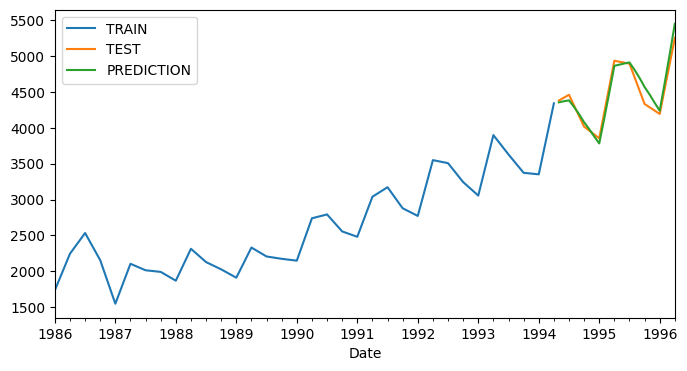

In [ ]:
train_data['Sales'].plot(legend=True,label='TRAIN')
test_data['Sales'].plot(legend=True,label='TEST',figsize=(8,4))
test_predictions.plot(legend=True,label='PREDICTION');

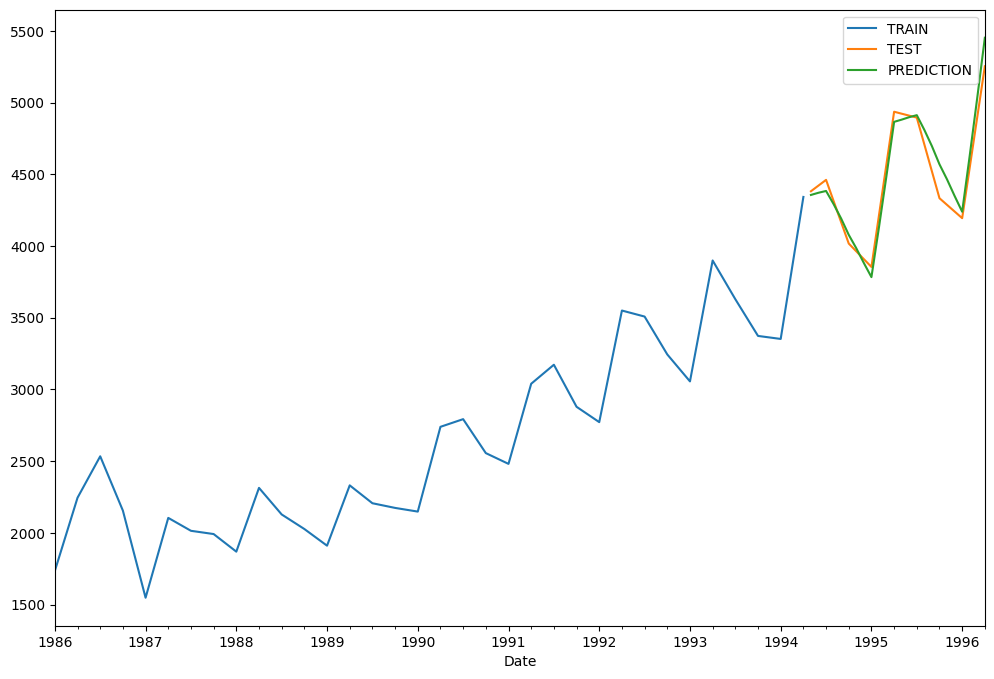

In [ ]:
train_data['Sales'].plot(legend=True,label='TRAIN')
test_data['Sales'].plot(legend=True,label='TEST',figsize=(12,8))
test_predictions.plot(legend=True,label='PREDICTION',xlim=['1986-01-31','1996-04-30']);

In [ ]:
# evaluation metrics

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
mean_squared_error(test_data,test_predictions)

10332.996713579369

In [ ]:
np.sqrt(mean_squared_error(test_data,test_predictions))

101.65134880354205

In [ ]:
test_data.describe()

,Sales
count,24.000000
mean,4454.916667
std,372.729795
min,3854.000000
25%,4209.500000
50%,4401.500000
75%,4754.500000
max,5253.000000


In [ ]:
# forecasting into future

In [ ]:
final_model = ExponentialSmoothing(interpolated['Sales'],trend='mul',seasonal='mul',seasonal_periods=12).fit()

In [ ]:
forecast_predictions = final_model.forecast(20)

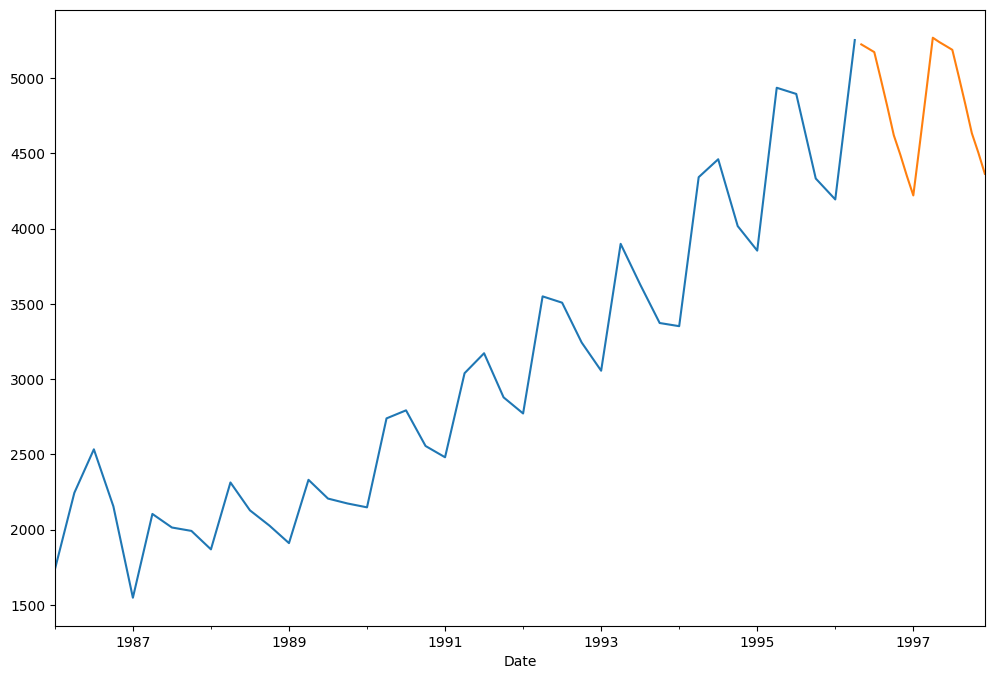

In [ ]:
interpolated['Sales'].plot(figsize=(12,8))
forecast_predictions.plot();

In [ ]:
# in this model understands trend but not seasonality

In [ ]:
# Holts-Winters method

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd
import numpy as np
%matplotlib inline

In [ ]:
print(df1)

                  Sales Quarters  Q1  Q2  Q3  Q4
Date                                            
1986-01-01  1734.827000       Q1   1   0   0   0
1986-04-01  2244.960999       Q2   0   1   0   0
1986-07-01  2533.804993       Q3   0   0   1   0
1986-10-01  2154.962997       Q4   0   0   0   1
1987-01-01  1547.818996       Q1   1   0   0   0
1987-04-01  2104.411995       Q2   0   1   0   0
1987-07-01  2014.362999       Q3   0   0   1   0
1987-10-01  1991.746998       Q4   0   0   0   1
1988-01-01  1869.049999       Q1   1   0   0   0
1988-04-01  2313.631996       Q2   0   1   0   0
1988-07-01  2128.320000       Q3   0   0   1   0
1988-10-01  2026.828999       Q4   0   0   0   1
1989-01-01  1910.603996       Q1   1   0   0   0
1989-04-01  2331.164993       Q2   0   1   0   0
1989-07-01  2206.549995       Q3   0   0   1   0
1989-10-01  2173.967995       Q4   0   0   0   1
1990-01-01  2148.278000       Q1   1   0   0   0
1990-04-01  2739.307999       Q2   0   1   0   0
1990-07-01  2792.753

In [ ]:
interpolated

,Sales
Date,
1986-01-31,1734.827000
1986-02-28,1904.871666
1986-03-31,2074.916332
1986-04-30,2244.960999
1986-05-31,2341.242330
...,...
1995-12-31,4240.333333
1996-01-31,4194.000000
1996-02-29,4547.000000


In [ ]:
interpolated.fillna(method='ffill')

,Sales
Date,
1986-01-31,1734.827000
1986-02-28,1904.871666
1986-03-31,2074.916332
1986-04-30,2244.960999
1986-05-31,2341.242330
...,...
1995-12-31,4240.333333
1996-01-31,4194.000000
1996-02-29,4547.000000


In [ ]:
interpolated.index

DatetimeIndex(['1986-01-31', '1986-02-28', '1986-03-31', '1986-04-30',
               '1986-05-31', '1986-06-30', '1986-07-31', '1986-08-31',
               '1986-09-30', '1986-10-31',
               ...
               '1995-07-31', '1995-08-31', '1995-09-30', '1995-10-31',
               '1995-11-30', '1995-12-31', '1996-01-31', '1996-02-29',
               '1996-03-31', '1996-04-30'],
              dtype='datetime64[ns]', name='Date', length=124, freq='M')

In [ ]:
interpolated.index.freq

<MonthEnd>

In [ ]:
#Simple Exponential Smoothing

In [ ]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
alpha = 0.15

In [ ]:
model_ses12=SimpleExpSmoothing(train_data['Sales'])
fitted_model= model_ses12.fit(smoothing_level=alpha,optimized=False)
fitted_model.fittedvalues

Date
1986-01-31    1734.827000
1986-02-28    1734.827000
1986-03-31    1760.333700
1986-04-30    1807.521095
1986-05-31    1873.137080
                 ...     
1993-12-31    3465.344617
1994-01-31    3449.392924
1994-02-28    3434.783986
1994-03-31    3471.866388
1994-04-30    3552.886430
Freq: M, Length: 100, dtype: float64

In [ ]:
interpolated['SES12'] = fitted_model.fittedvalues.shift(-1)
interpolated.head()

,Sales,SES12
Date,,
1986-01-31,1734.827000,1906.428421
1986-02-28,1904.871666,2074.923594
1986-03-31,2074.916332,2244.961032
1986-04-30,2244.960999,2415.005665
1986-05-31,2341.242330,2437.867730


In [ ]:
#Double Exponential Smoothing


In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

mod_add12 = ExponentialSmoothing(train_data['Sales'], trend='add')
fitted_model= mod_add12.fit(24)
interpolated['DESadd12'] = fitted_model.fittedvalues.shift(-1)
interpolated.head()

,Sales,SES12,DESadd12
Date,,,
1986-01-31,1734.827000,1906.428421,2.348053e+264
1986-02-28,1904.871666,2074.923594,-5.432530e+265
1986-03-31,2074.916332,2244.961032,1.255681e+267
1986-04-30,2244.960999,2415.005665,-2.902514e+268
1986-05-31,2341.242330,2437.867730,6.709168e+269


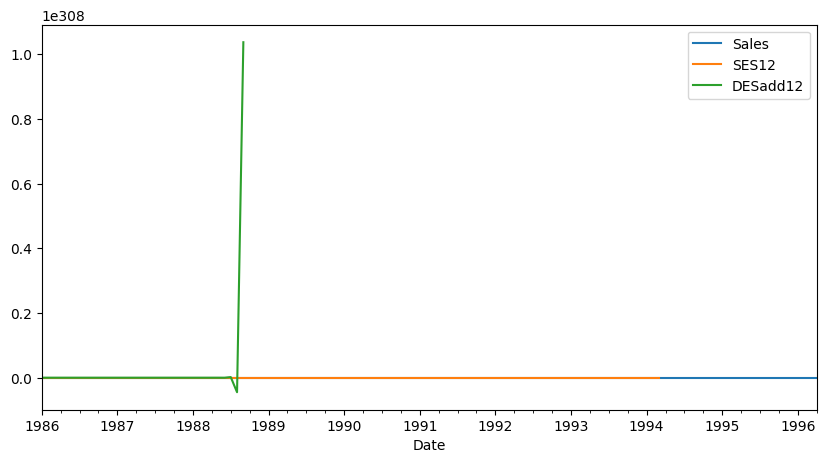

In [ ]:
interpolated[['Sales','SES12','DESadd12']].plot(figsize=(10,5));

In [ ]:
interpolated['DESmul12'] = ExponentialSmoothing(interpolated['Sales'], trend='mul').fit().fittedvalues.shift(-1)
interpolated.head()

,Sales,SES12,DESadd12,DESmul12
Date,,,,
1986-01-31,1734.827000,1906.428421,2.348053e+264,1583.618519
1986-02-28,1904.871666,2074.923594,-5.432530e+265,2076.619055
1986-03-31,2074.916332,2244.961032,1.255681e+267,2262.119604
1986-04-30,2244.960999,2415.005665,-2.902514e+268,2429.646930
1986-05-31,2341.242330,2437.867730,6.709168e+269,2445.113977


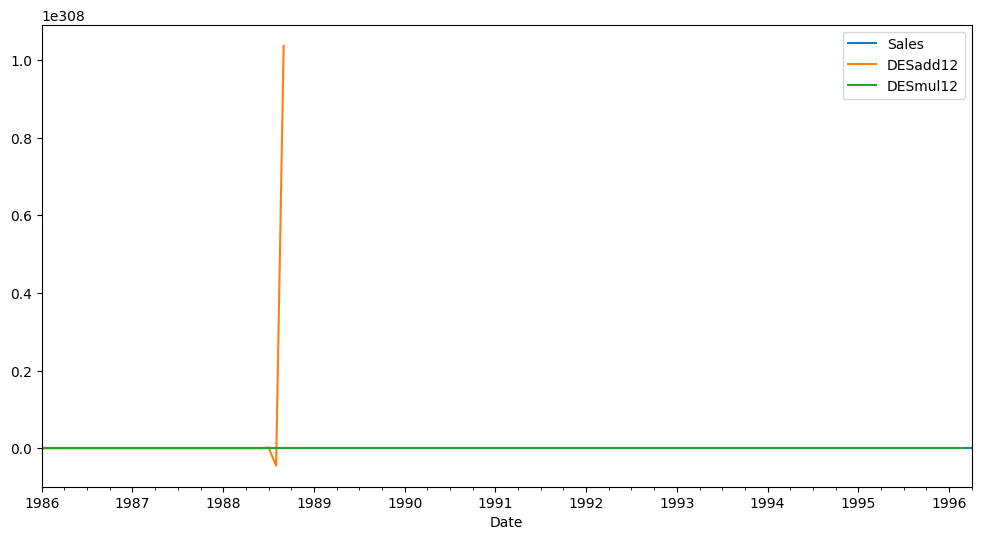

In [ ]:
interpolated[['Sales','DESadd12','DESmul12']].plot(figsize=(12,6));

In [ ]:
#Triple Exponential Smoothing

In [ ]:
interpolated['TESadd12'] = ExponentialSmoothing(interpolated['Sales'],trend='add',seasonal='add',seasonal_periods=12).fit().fittedvalues
interpolated.head()

,Sales,SES12,DESadd12,DESmul12,TESadd12
Date,,,,,
1986-01-31,1734.827000,1906.428421,2.348053e+264,1583.618519,1692.908869
1986-02-28,1904.871666,2074.923594,-5.432530e+265,2076.619055,1917.727142
1986-03-31,2074.916332,2244.961032,1.255681e+267,2262.119604,2075.170403
1986-04-30,2244.960999,2415.005665,-2.902514e+268,2429.646930,2222.267086
1986-05-31,2341.242330,2437.867730,6.709168e+269,2445.113977,2206.461955


In [ ]:
interpolated['TESmul12'] = ExponentialSmoothing(interpolated['Sales'],trend='mul',seasonal='mul',seasonal_periods=12).fit().fittedvalues
interpolated.head()

,Sales,SES12,DESadd12,DESmul12,TESadd12,TESmul12
Date,,,,,,
1986-01-31,1734.827000,1906.428421,2.348053e+264,1583.618519,1692.908869,1945.685394
1986-02-28,1904.871666,2074.923594,-5.432530e+265,2076.619055,1917.727142,1670.743041
1986-03-31,2074.916332,2244.961032,1.255681e+267,2262.119604,2075.170403,2059.541645
1986-04-30,2244.960999,2415.005665,-2.902514e+268,2429.646930,2222.267086,2250.410971
1986-05-31,2341.242330,2437.867730,6.709168e+269,2445.113977,2206.461955,2253.668102


<Axes: xlabel='Date'>

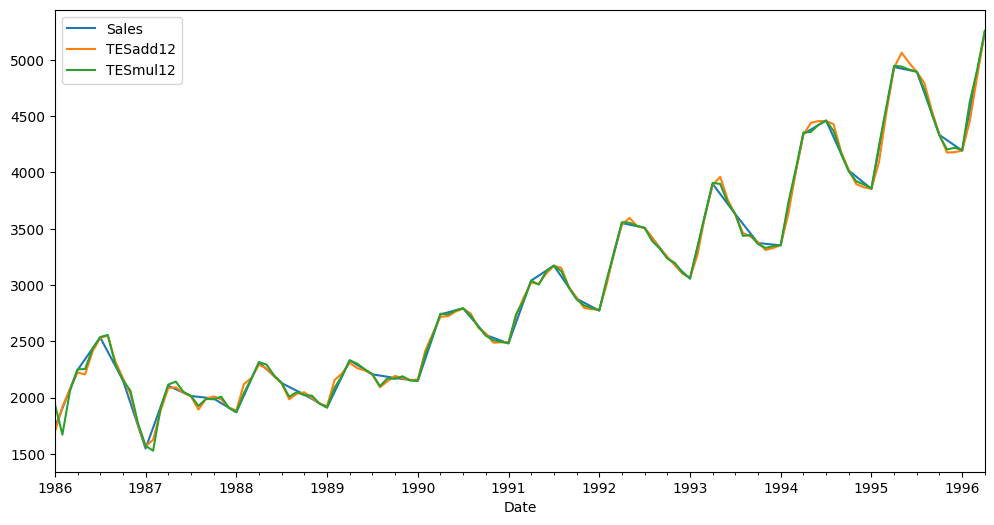

In [ ]:
interpolated[['Sales','TESadd12','TESmul12']].plot(figsize=(12,6))

<Axes: xlabel='Date'>

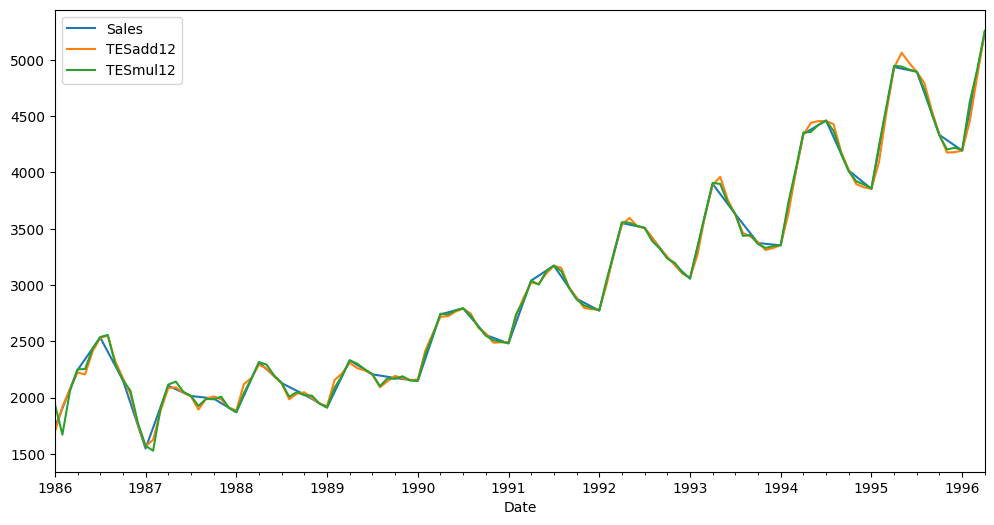

In [ ]:
interpolated[['Sales','TESadd12','TESmul12']].plot(figsize=(12,6))

In [ ]:
#Autoregressive Integrated Moving Averages (ARIMA)


In [ ]:
import matplotlib.pyplot as plt

from math import sqrt
import plotly.express as px
from scipy.stats import boxcox
import plotly.graph_objects as go
from pandas.plotting import lag_plot
import statsmodels.formula.api as smf
from plotly.subplots import make_subplots
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

we have quarterly data the window size for moving average is equal to 4

In [ ]:
def test_stationarity(timeseries):

    # Determine rolling statistics
    movingAverage = timeseries.rolling(window=4).mean()
    movingSTD = timeseries.rolling(window=4).std()

    # Plot rolling statistics
    orig = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(movingAverage, color='red', label='Rolling Mean')
    plt.legend(loc='best')
    plt.title('Rolling Mean')
    plt.show(block=False)

    # Perform Dickey–Fuller test:
    print('Results of Dickey Fuller Test:')
    dftest = adfuller(timeseries['Sales'], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)


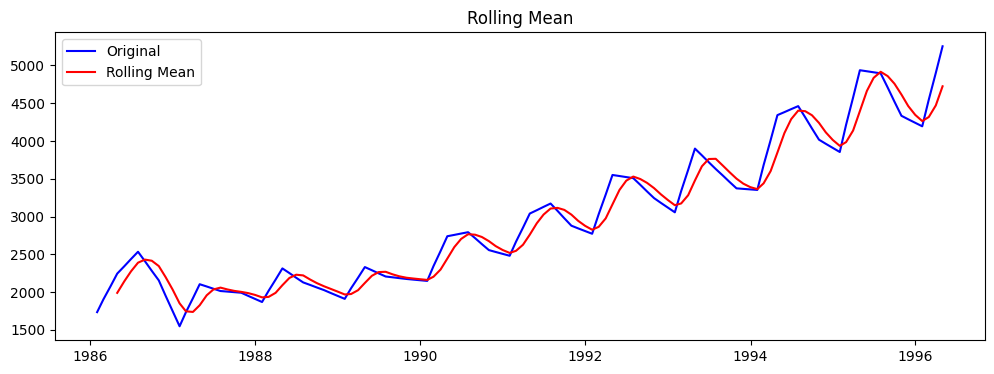

Results of Dickey Fuller Test:
Test Statistic                   0.572599
p-value                          0.986920
#Lags Used                      10.000000
Number of Observations Used    113.000000
Critical Value (1%)             -3.489590
Critical Value (5%)             -2.887477
Critical Value (10%)            -2.580604
dtype: float64


In [ ]:
plt.figure(figsize=(12,4))
sales= pd.DataFrame()
sales['Sales'] = interpolated[['Sales']]
test_stationarity(sales)

In [ ]:
def adf_test(series):
    result = adfuller(series.dropna())
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)
    if result[1] <= 0.05:
        print("Reject the null hypothesis")
        print("Data is stationary")
    else:
        print("Fail to reject the null hypothesis")
        print("Data is non-stationary")

In [ ]:
adf_test(sales.Sales)

Fail to reject the null hypothesis
Data is non-stationary


In [ ]:
#Feature Scaling (Transformations)
#1. Square Root Transform

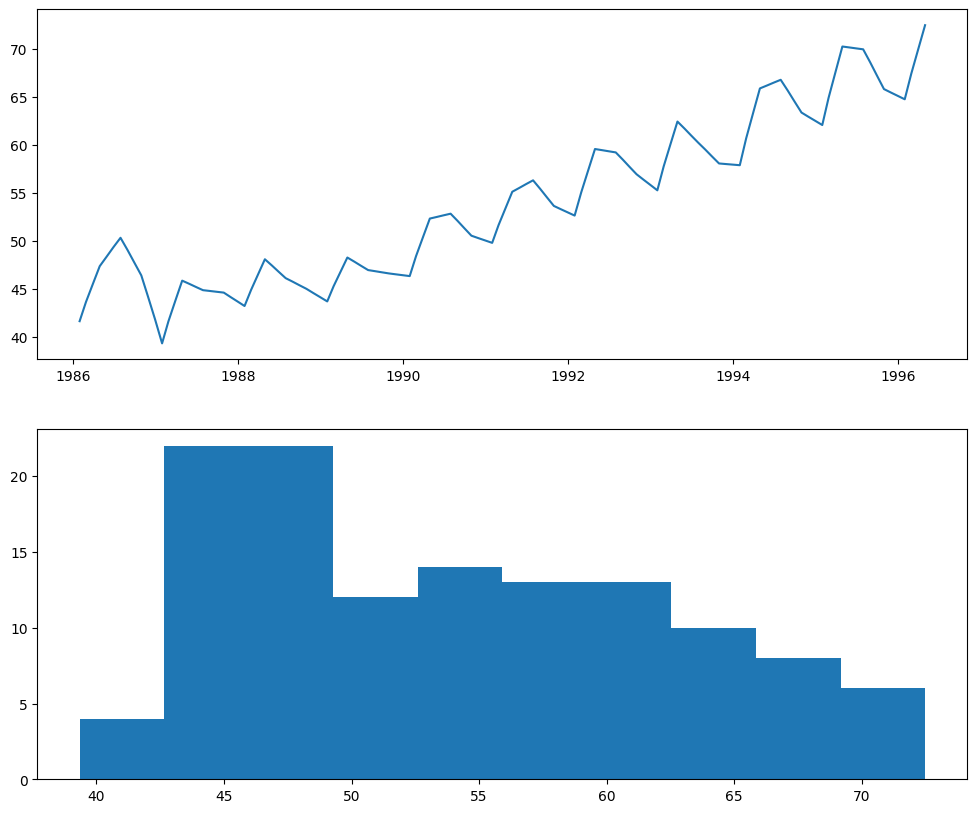

In [ ]:
square_root= pd.DataFrame()
square_root = interpolated[['Sales']]
square_root['Sales'] = np.sqrt(square_root.Sales)

# line chart
fig=plt.figure(figsize=(12,10))
plt.subplot(211)
plt.plot(square_root['Sales'])

# Histogram
plt.subplot(212)
plt.hist(square_root['Sales'])
plt.show()

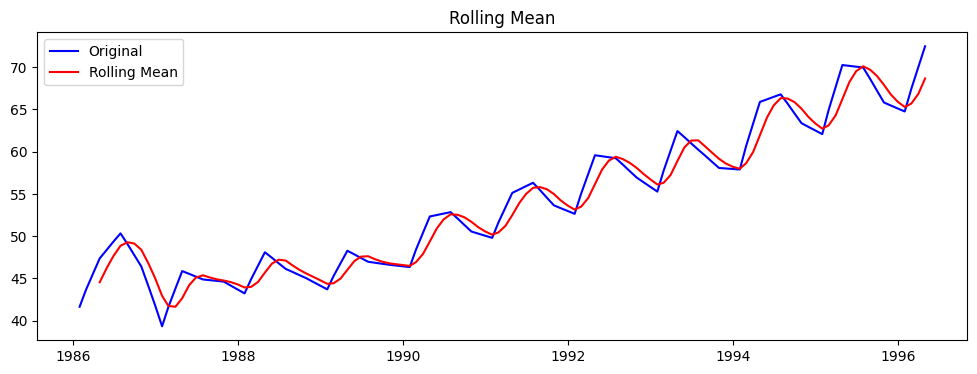

Results of Dickey Fuller Test:
Test Statistic                   0.728012
p-value                          0.990381
#Lags Used                      13.000000
Number of Observations Used    110.000000
Critical Value (1%)             -3.491245
Critical Value (5%)             -2.888195
Critical Value (10%)            -2.580988
dtype: float64


In [ ]:
plt.figure(figsize=(12,4))
test_stationarity(square_root)

In [ ]:
adf_test(square_root.Sales)

Fail to reject the null hypothesis
Data is non-stationary


In [ ]:
#2. log transform

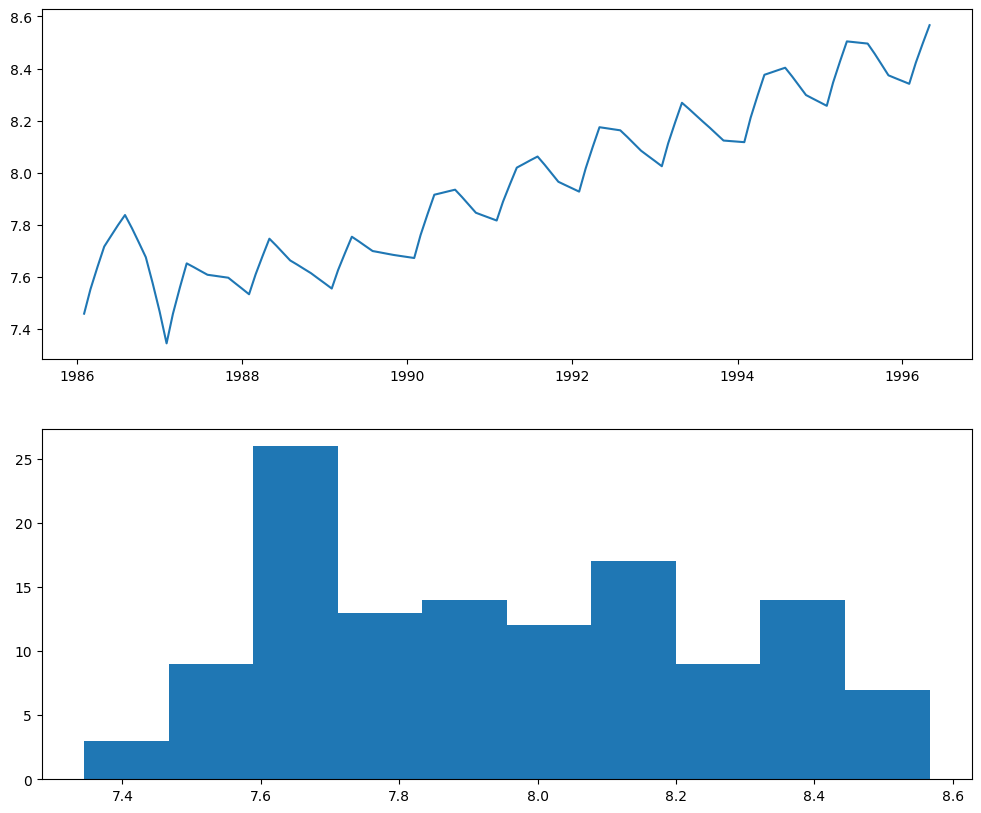

In [ ]:
log = pd.DataFrame()
log = interpolated[['Sales']]
log['Sales'] = np.log(log.Sales)

# line chart
fig = plt.figure(figsize=(12,10))
plt.subplot(211)
plt.plot(log['Sales'])

# Histogram
plt.subplot(212)
plt.hist(log['Sales'])
plt.show()

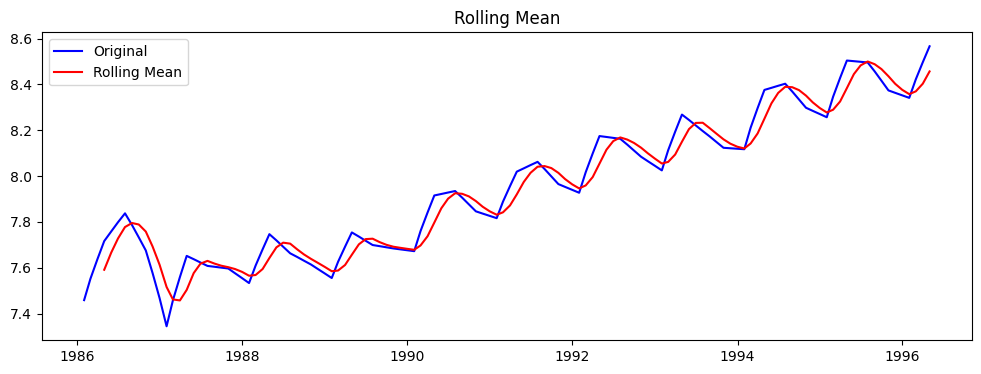

Results of Dickey Fuller Test:
Test Statistic                   0.451508
p-value                          0.983322
#Lags Used                      13.000000
Number of Observations Used    110.000000
Critical Value (1%)             -3.491245
Critical Value (5%)             -2.888195
Critical Value (10%)            -2.580988
dtype: float64


In [ ]:
plt.figure(figsize=(12,4))
test_stationarity(log)

In [ ]:
adf_test(log.Sales)

Fail to reject the null hypothesis
Data is non-stationary


In [ ]:
# box-cox transform

,Sales
Date,
1986-01-31,7.458663
1986-02-28,7.552170
1986-03-31,7.637676
1986-04-30,7.716443
1986-05-31,7.758437


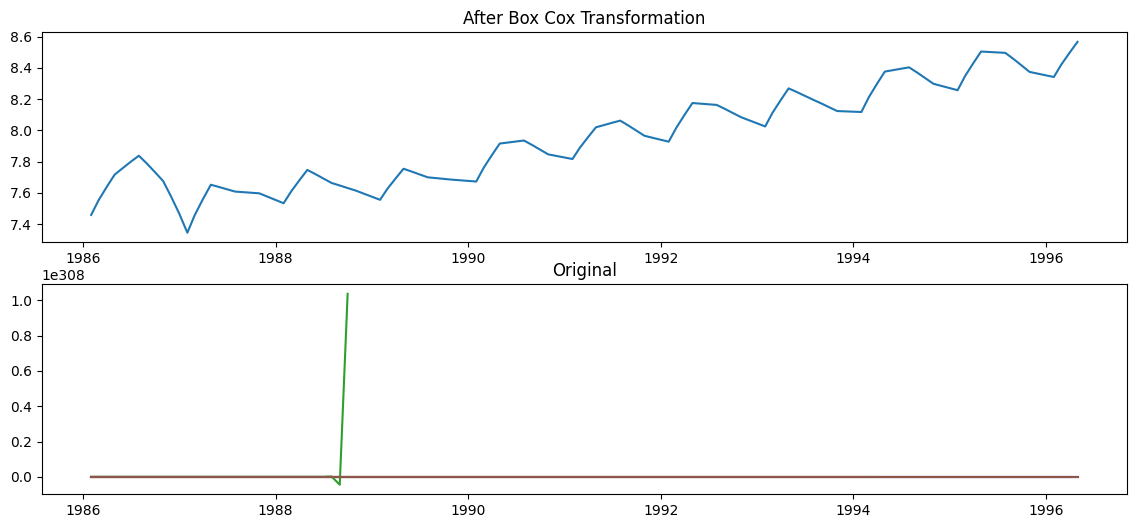

In [ ]:
data_boxcox = pd.DataFrame()
data_boxcox['Sales'] = pd.Series(boxcox(interpolated['Sales'], lmbda=0), interpolated.index)
display(data_boxcox.head())
fig, axis = plt.subplots(2,figsize=(14,6),)
axis[0].plot(data_boxcox)
axis[0].set_title('After Box Cox Transformation')
axis[1].plot(interpolated, label='original')
axis[1].set_title('Original')
plt.show()

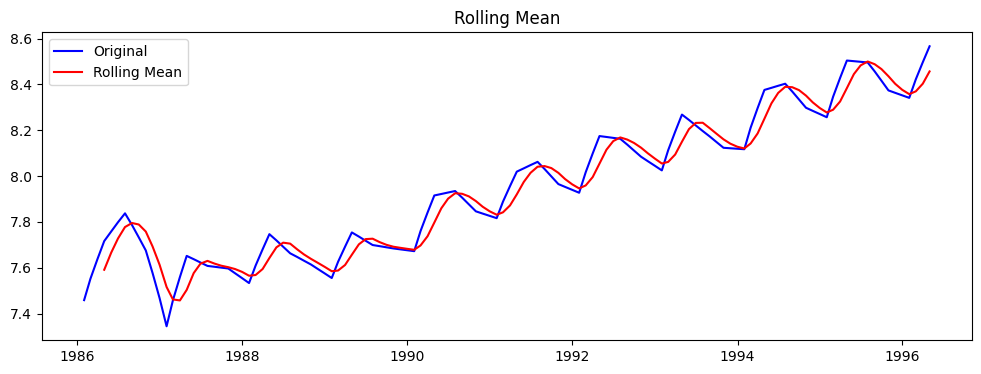

Results of Dickey Fuller Test:
Test Statistic                   0.451508
p-value                          0.983322
#Lags Used                      13.000000
Number of Observations Used    110.000000
Critical Value (1%)             -3.491245
Critical Value (5%)             -2.888195
Critical Value (10%)            -2.580988
dtype: float64


In [ ]:
plt.figure(figsize=(12,4))
test_stationarity(data_boxcox)


In [ ]:
adf_test(data_boxcox)

Fail to reject the null hypothesis
Data is non-stationary


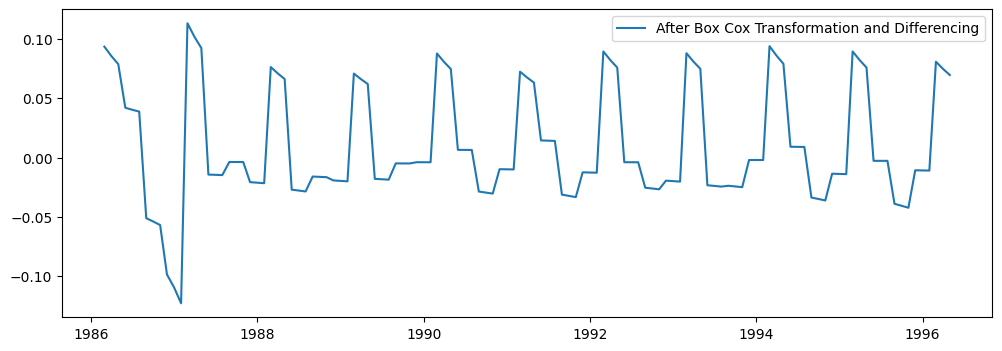

In [ ]:
#Differencing of the Box-Cox Transformation
data_boxcox_diff = data_boxcox - data_boxcox.shift()
data_boxcox_diff.dropna(inplace=True)
plt.figure(figsize=(12,4))
plt.plot(data_boxcox_diff, label='After Box Cox Transformation and Differencing')
plt.legend(loc='best')
plt.show()

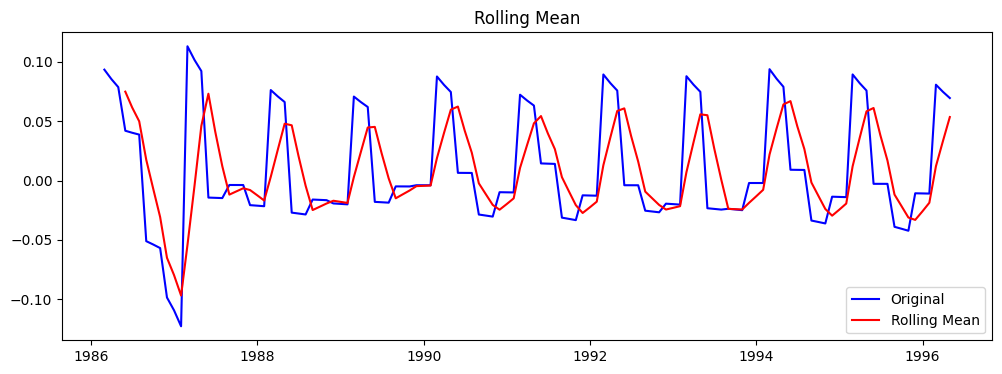

Results of Dickey Fuller Test:
Test Statistic                  -3.030060
p-value                          0.032181
#Lags Used                      12.000000
Number of Observations Used    110.000000
Critical Value (1%)             -3.491245
Critical Value (5%)             -2.888195
Critical Value (10%)            -2.580988
dtype: float64


In [ ]:
plt.figure(figsize=(12,4))
test_stationarity(data_boxcox_diff)

In [ ]:

adf_test(data_boxcox_diff)

Reject the null hypothesis
Data is stationary


In [ ]:
#Building The Time Series Forecasting with Optimal Value using ARIMA


In [ ]:
train_data_boxcox = data_boxcox[:100]
test_data_boxcox = data_boxcox[100:]
train_data_boxcox_diff = data_boxcox_diff[:99]
test_data_boxcox_diff = data_boxcox_diff[99:]

In [ ]:
#ARIMA Hyperparameter Tuning

In [ ]:
# Grid search ARIMA parameters for a time series
# Evaluate an ARIMA model for a given order (p,d,q) and return RMSE

def evaluate_arima_model(X, arima_order):

# Prepare training dataset
    X = X.astype('float32')
    train_size = int(len(X) * 0.70)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]

# Make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])

# Calculate out of sample error
    rmse = sqrt(mean_squared_error(test, predictions))
    return rmse

# Evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float('inf'), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(dataset, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                except Exception as e:
                    print(e)
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

In [ ]:
# Evaluate parameters
p_values = range(0,5)
d_values = range(0,5)
q_values = range(0,5)
evaluate_models(train_data_boxcox_diff.Sales, p_values, d_values, q_values)

In [ ]:
#Inverse transformation of the Box-Cox Differencing

In [ ]:
model = ARIMA(train_data_boxcox_diff, order=(4, 1, 4))
model_fit = model.fit()
y_hat_ar = data_boxcox_diff.copy()
y_hat_ar['arima_forecast'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())

# We did differencing. So we need to revert it by adding the consecutive observations.
# For that we are using cumsum() method
y_hat_ar['arima_forecast'] = y_hat_ar['arima_forecast'].cumsum()

# We removed the first observations after differencing as it was null. Hence, adding the first observation back.
y_hat_ar['arima_forecast'] = y_hat_ar['arima_forecast'].add(data_boxcox.Passengers[0])

# Now doing the reverse transformation
# We have done Box Cox Log Log transformation with lambda = 0
# Hence, we have to the exponential as it is the reverse of the log.
y_hat_ar['arima_forecast'] = np.exp(y_hat_ar['arima_forecast'])

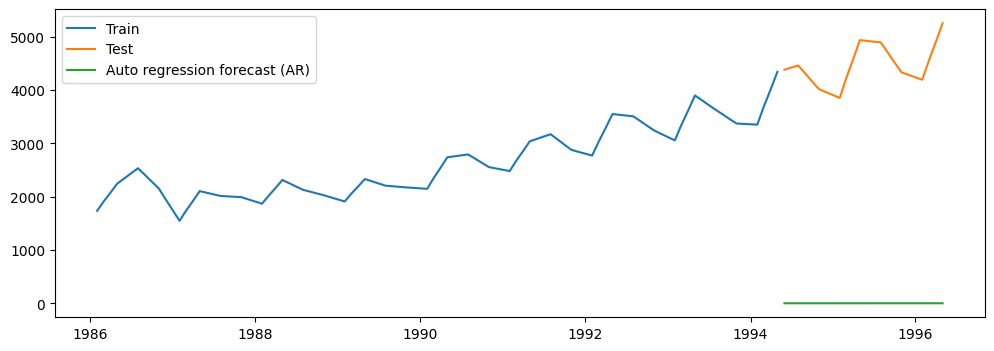

In [ ]:
plt.figure(figsize=(12,4))
plt.plot(train_data['Sales'], label='Train')
plt.plot(test_data, label='Test')
plt.plot(y_hat_ar['arima_forecast'][test_data.index.min():], label='Auto regression forecast (AR)')
plt.legend(loc='best')
plt.show()

In [ ]:
#RMSE
rmse_arima = np.sqrt(mean_squared_error(test_data, y_hat_ar['arima_forecast'][test_data.index.min():])).round(2)
rmse_arima

4468.73

In [ ]:
#MAPE
mape_arima = round(np.mean(np.abs((test_data.Sales - y_hat_ar['arima_forecast'][test_data.index.min():])/test_data.Sales)*100),2)
mape_arima

99.97

In [ ]:
#The mean of the Residual should be zero or close to Zero

In [ ]:
model_residual = model_fit.resid
model_residual.mean()

0.03703274203999538

In [ ]:
# NO AUTOCORRELATION B/W RESIDUALS

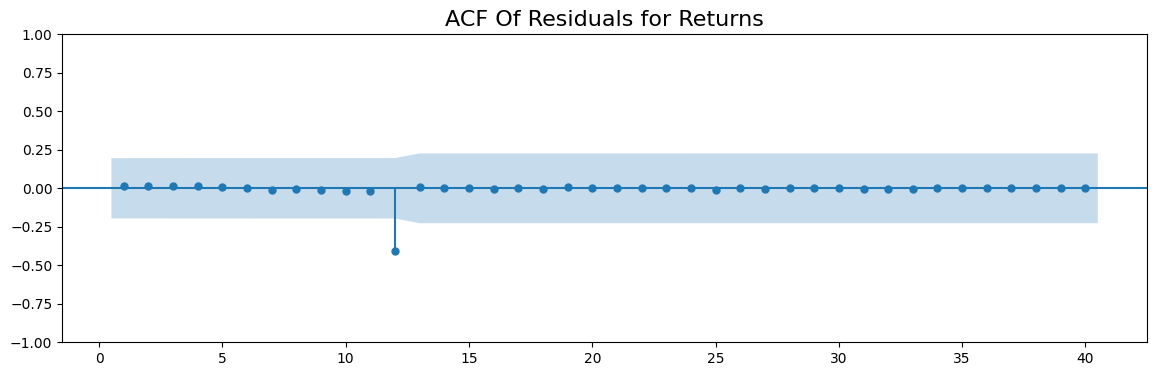

Reject the null hypothesis
Data is stationary


In [ ]:
plt.rcParams["figure.figsize"] = (14,4)
plot_acf(model_residual, zero = False, lags = 40)
plt.title("ACF Of Residuals for Returns",size=16)
plt.show()
adf_test(model_residual)

In [ ]:
# RESIDUAL MUST BE RANDOM

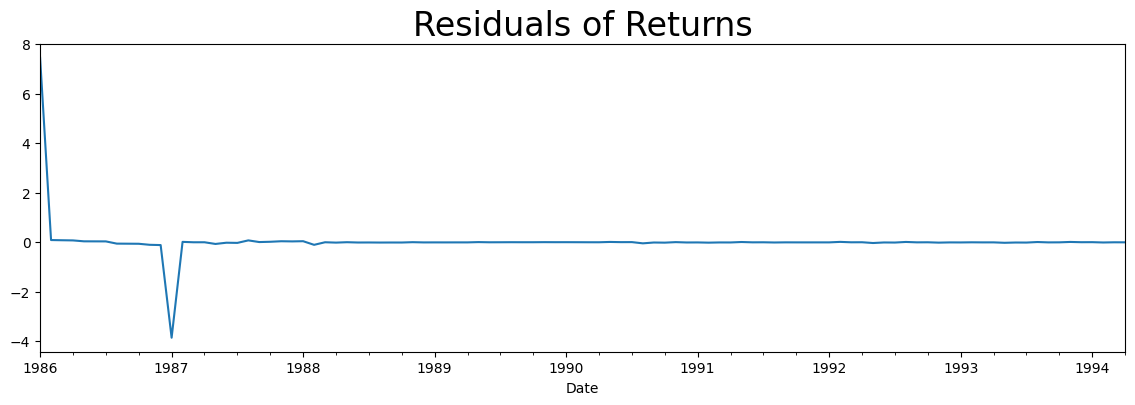

In [ ]:
model_residual.plot(figsize=(14,4))
plt.title("Residuals of Returns", size=24)
plt.show()

Seasonal Auto Regressive Integrated Moving Average (SARIMA)
We are only passing the Box Cox because the ARIMAX will perform the differencing internally
seasonal_order P=1, Q=1, D=1 and m=12 || m=12 . Because the seasonality is monthly.

In [ ]:
model = SARIMAX(train_data_boxcox, order=(1,1,1), seasonal_order=(1,1,1,12))
model_fit= model.fit()
y_hat_sarima = data_boxcox_diff.copy()

Inverse Transformation of the Differencing Box-Cox Transformation

In [ ]:

y_hat_sarima['sarima_forecast_boxcox'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_sarima['sarima_forecast'] = np.exp(y_hat_sarima['sarima_forecast_boxcox'])
y_hat_sarima['sarima_forecast'] = np.exp(y_hat_sarima['sarima_forecast_boxcox'])

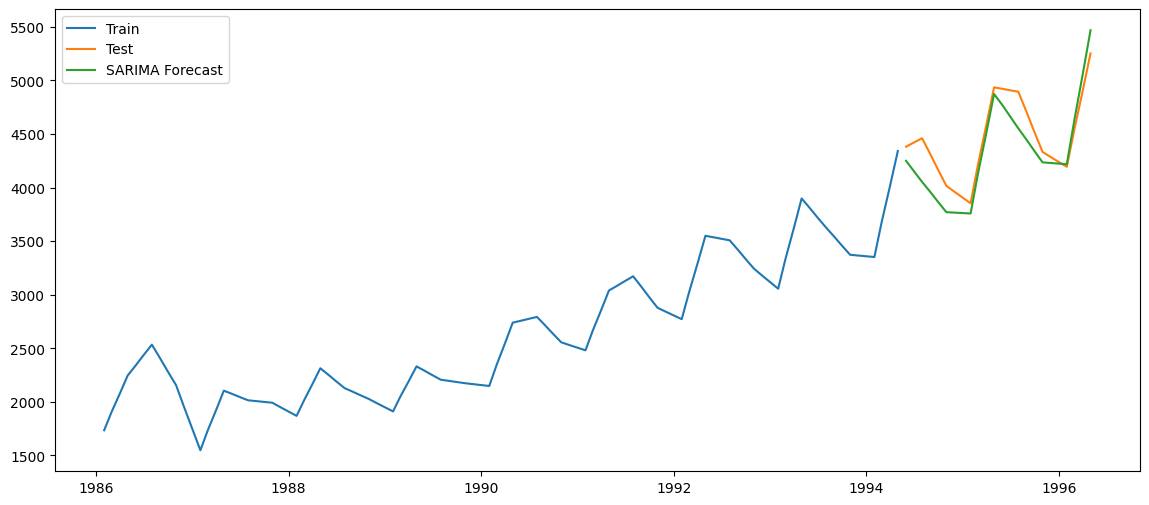

In [ ]:
plt.figure(figsize=(14,6))
plt.plot(train_data['Sales'], label='Train')
plt.plot(test_data, label='Test')
plt.plot(y_hat_sarima['sarima_forecast'][test_data.index.min():], label='SARIMA Forecast')
plt.legend(loc='best')
plt.show()

Model Evaluation

RMSE (Root Mean Squared Error)

In [ ]:
rmse_sarima = np.sqrt(mean_squared_error(test_data, y_hat_sarima['sarima_forecast'][test_data.index.min():])).round(2)
rmse_sarima

204.64

MAPE

In [ ]:
mape_sarima = round(np.mean(np.abs((test_data.Sales - y_hat_sarima['sarima_forecast'][test_data.index.min():])/test_data.Sales)*100),2)
mape_sarima


3.91

Analysing the Residuals

The mean of the Residual should be zero or close to Zero[link text](https://)

In [ ]:

model_residual = model_fit.resid
model_residual.mean()

0.03703274203999538

Residuals must be stationary

In [ ]:
adf_test(model_residual)

Reject the null hypothesis
Data is stationary


No autocorrelation between residuals


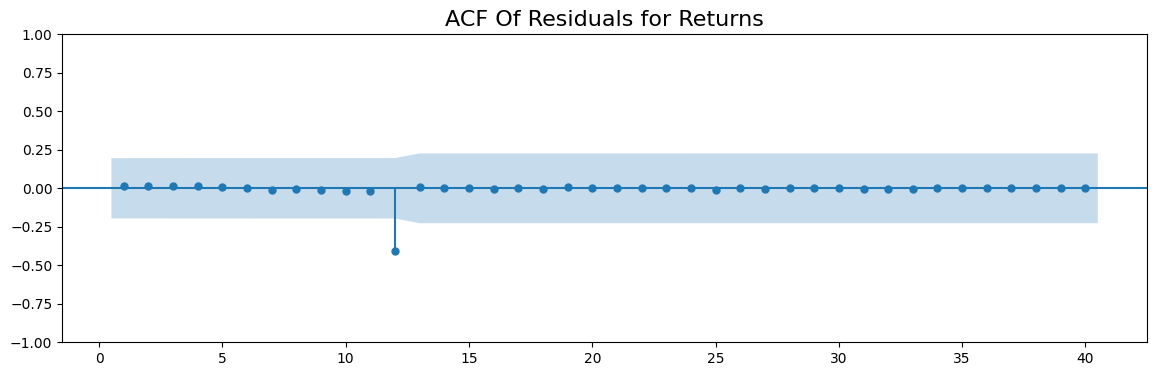

In [ ]:
plt.rcParams["figure.figsize"] = (14,4)
plot_acf(model_residual, zero = False, lags = 40)
plt.title("ACF Of Residuals for Returns",size= 16)
plt.show()

Residuals must be random

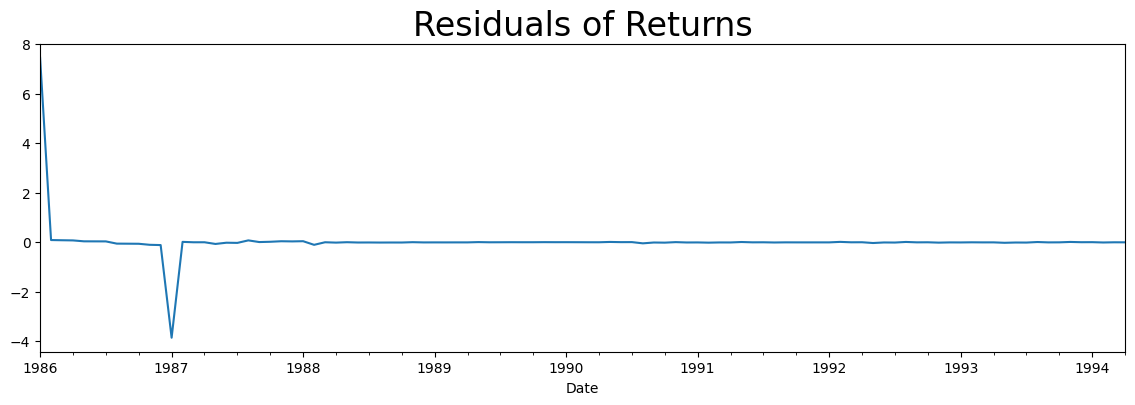

In [ ]:
model_residual.plot(figsize=(14,4))
plt.title("Residuals of Returns", size=24)
plt.show()